# **WILL THE CLIENT SUBSCRIBE A TERM DEPOSIT?**

## **INTRODUCTION**

**The objective of this project is to predict whether a client of a Portuguese banking institution will subscribe to a term deposit**. The target variable is the column `y` in the `bank-full.csv` dataset.

The data were collected from the **UCI Machine Learning Repository**, which is a collection of databases used by the machine learning community for empirical analysis of machine learning algorithms:

https://archive.ics.uci.edu/dataset/222/bank+marketing

Full project repository link: https://github.com/CarloH-AI/bank_deposit_prediction_project.git

The `bank-full.csv` dataset is **multivariate**, meaning there are two or more variables measured on each individual unit. Each column in the `bank-full.csv` dataset represents a variable. Here are the variables:

- `age`: An integer representing the age of the client.
- `job`: A string representing the type of occupation of the client.
- `marital`: A string representing the marital status of the client.
- `education`: A string representing the educational level of the client.
- `default`: A string representing if the client has a credit in default.
- `balance`: An integer representing the average yearly balance of the client's account in euros.
- `housing`: A string representing if the client has a housing loan.
- `loan`: A string representing if the client has a personal loan.
- `contact`: A string representing the type of contact the bank has with the client.
- `day_of_week`: An integer representing the last contact day of the week the bank reached the client.
- `month`: A string representing the last contact month the bank reached the client.
- `duration`: An integer representing the last contact duration from bank to client in seconds.
- `campaign`: An integer representing the number of contacts performed during this campaign for this client.
- `pdays`: An integer representing the number of days that passed by after the client was last contacted from a previous campaign.
- `previous`: An integer representing the number of contacts performed before this campaign for this client.
- `poutcome`: A string representing the outcome of the previous marketing campaign.
- `y`: A string representing if the client subscribed to a term deposit.

## **PART 0: PREPARE THE SYSTEM**

In [22]:
# Download required libraries
%pip install pandas
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Import libraries to read and manipulate data
import os
import pandas as pd
import numpy as np
from scipy.stats import kstest
from sklearn.preprocessing import RobustScaler

# Import libraries to visualize data
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries to prepare data for machine learning models
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Import libraries to create machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import libraries to evaluate machine learning models
from sklearn import metrics

## **PART 1: PREPARE THE DATA**

### **SECTION A: DATA LOADING**

In [24]:
df_url = 'https://raw.githubusercontent.com/CarloH-AI/bank_deposit_prediction_project/refs/heads/main/dataset/bank-full.csv'

# Specify the separator ';' since the CSV use ';' as the delimiter instead of ','
# Specify the NaN values as 'unknown' to take into account them
bank_df = pd.read_csv(df_url, sep=';', na_values='unknown')

bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [25]:
# Display shape of the DataFrame
print('The dataset has {} rows and {} columns.'.format(bank_df.shape[0], bank_df.shape[1]))

The dataset has 45211 rows and 17 columns.


In [26]:
# Display information about the DataFrame
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [27]:
# Check if there is some NaN values
if (bank_df.isnull().values.any()) == True:
    print('There are NaN values in the dataset.')
else:
    print('There are no NaN values in the dataset.')

There are NaN values in the dataset.


`bank_df` has 45211 rows and 17 columns. The majority of NaN values are present in columns with 'object' data type. The column with the most NaN values is `poutcome`, followed by `contact`, `education`, and `job`.

In [28]:
# Compute and transpose the summary statistics DataFrame
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Typically, machine learning algorithms perform best with datasets where the means are close to 0 and the standard deviation is close to 1. In this dataset, only the `previous` column is close to meet this condition.

Additionally, when considering quantiles, only the `age` column appears to approximate a normal distribution, which is optimal for machine learning models. Further investigations will be done in this sense.

### **SECTION B: DATA CLEANING**

In [29]:
# Calculate the number of missing values for each feature, sort them in descending order
missing_values = bank_df.isnull().sum().sort_values(ascending=False)

# Create a DataFrame to store the missing values along with their corresponding features
missing_values = pd.DataFrame(missing_values, columns=['Missing Values'])

# Add a column 'Feature' to the DataFrame, which contains the feature names
missing_values['Feature'] = missing_values.index

# Rearrange the columns to have 'Feature' as the first column
missing_values = missing_values[['Feature', 'Missing Values']]

missing_values

,Feature,Missing Values
poutcome,poutcome,36959
contact,contact,13020
education,education,1857
job,job,288
month,month,0
previous,previous,0
pdays,pdays,0
campaign,campaign,0
duration,duration,0
age,age,0


As previously mentioned, the columns `poutcome`, `contact`, `education`, and `job` contain NaN values. Specifically, there are 36959, 13020, 1857, and 288 missing values in these columns respectively.

Given that this dataset pertains to a marketing campaign, some columns may be interconnected in terms of missing values. Therefore, I will investigate this aspect.

In [30]:
# Filter rows where 'pdays' is -1, 'contact' is NaN, and 'previous' is 0
count_rows = bank_df.loc[(bank_df['pdays'] == -1) & (bank_df['contact'].isna()) & (bank_df['previous'] == 0)].count()

# Extract the count of rows
num_rows = count_rows['pdays']

print("Number of rows where 'pdays' is equal to -1, 'contact' is equal to 'NaN', and 'previous' is equal to 0:", num_rows)

Number of rows where 'pdays' is equal to -1, 'contact' is equal to 'NaN', and 'previous' is equal to 0: 12950


In [31]:
# Filter rows where 'pdays' is -1, 'contact' is NaN, 'previous' is 0, and 'y' is 'no'
count_rows = bank_df.loc[(bank_df['pdays'] == -1) & (bank_df['contact'].isna()) & (bank_df['previous'] == 0) & (bank_df['y'] == 'no')].count()

# Extract the count of rows
num_rows = count_rows['pdays']

print("Never contacted individuals who declined the term deposit:", num_rows)

Never contacted individuals who declined the term deposit: 12432


In the dataset, there are 12950 rows where `pdays` equals -1, indicating individuals who have never been contacted before, `contact` equals NaN, indicating individuals whose contact method is unknown, and `previous` equals 0, indicating they have never been contacted in previous campaigns.

This means that almost 30% of the people in the dataset have never been contacted before and they are indicated with 'no' in the target variable column. This could introduce bias in the machine learning phase in terms of predictions because individuals who have never been contacted are assumed to have responded negatively. Therefore, I'll drop all these data even though I'll lose 30% of all my information.

In [32]:
# Drop missing values (pd.NA) in 'contact' column
bank_df_unknown = bank_df.dropna(subset=['contact'])
bank_df_unknown

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,NaN,no
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,NaN,no
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,NaN,no
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,NaN,no
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


To avoid losing other information, I'll replace other NaN values with the string 'unknown' and treat it as a feature of the DataFrame.

In [33]:
# Replace missing values (pd.NA) with 'unknown' in the all DataFrame
bank_df_unknown = bank_df_unknown.fillna('unknown')
bank_df_unknown

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,unknown,no
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,unknown,no
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,unknown,no
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,unknown,no
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


To ensure a consistent representation of data within the DataFrame, I reset the index of the DataFrame itself.

In [34]:
# Reset index of the DataFrame
bank_df_unknown = bank_df_unknown.reset_index(drop=True)
bank_df_unknown

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,unknown,no
1,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,unknown,no
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,unknown,no
3,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,unknown,no
4,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
32187,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
32188,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
32189,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [35]:
# Initialize dictionaries to store counts
unknown_counts = {}
total_counts = {}

# Iterate over each column in the DataFrame
for col in bank_df_unknown.columns:
    # Calculate the number of 'unknown' values in the current column
    unknown_counts[col] = (bank_df_unknown[col] == 'unknown').sum()
    
    # Calculate the total number of values in the current column (excluding missing values)
    total_counts[col] = bank_df_unknown[col].count()

# Create a DataFrame with the results
unknown_info = pd.DataFrame({'Unknown Count': unknown_counts, 'Total Entries': total_counts})

# Sort DataFrame by 'Unknown Count' in ascending order
unknown_info = unknown_info.sort_values(by='Unknown Count', ascending=False)

# Print the DataFrame
unknown_info

,Unknown Count,Total Entries
poutcome,24009,32191
education,1180,32191
job,177,32191
age,0,32191
month,0,32191
previous,0,32191
pdays,0,32191
campaign,0,32191
duration,0,32191
contact,0,32191


The variable `poutcome` still contains many missing values, so I will drop it.

Now I'll proceed to examine the distribution within the quantitative variables.

In [36]:
# Perform Kolmogorov-Smirnov test for all quantitative columns
for column in bank_df_unknown.select_dtypes(include=['int64', 'float64']).columns:
    statistic, p_value = kstest(bank_df_unknown[column], 'norm')
    print('Kolmogorov-Smirnov test statistics for column', column)
    print('Statistic:', statistic)
    print('p-value:', p_value)
    print()

Kolmogorov-Smirnov test statistics for column age
Statistic: 1.0
p-value: 0.0

Kolmogorov-Smirnov test statistics for column balance
Statistic: 0.8377976898034791
p-value: 0.0

Kolmogorov-Smirnov test statistics for column day
Statistic: 0.969483722234667
p-value: 0.0

Kolmogorov-Smirnov test statistics for column duration
Statistic: 0.9998133258488164
p-value: 0.0

Kolmogorov-Smirnov test statistics for column campaign
Statistic: 0.8413447460685429
p-value: 0.0

Kolmogorov-Smirnov test statistics for column pdays
Statistic: 0.5870190028483883
p-value: 0.0

Kolmogorov-Smirnov test statistics for column previous
Statistic: 0.5
p-value: 0.0



The Kolmogorov-Smirnov test statistics highlight normally distributed columns if the p-value is greater than 0.05. Since no column has this feature I'll need to normalize them.

In [37]:
# Check for outliers in numerical columns
numerical_columns = bank_df_unknown.select_dtypes(include=['int64', 'float64']).columns

# Calculate the interquartile range (IQR) for each numerical column
Q1 = bank_df_unknown[numerical_columns].quantile(0.25)
Q3 = bank_df_unknown[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outlier detection
outlier_threshold = 1.5

# Identify outliers
outliers = ((bank_df_unknown[numerical_columns] < (Q1 - outlier_threshold * IQR)) | (bank_df_unknown[numerical_columns] > (Q3 + outlier_threshold * IQR)))
outliers_count = outliers.sum()

# Print columns with outliers and their count
print("Columns with outliers:")
for col in outliers_count.index:
    if outliers_count[col] > 0:
        print(f"{col}: {outliers_count[col]} outliers")

Columns with outliers:
age: 300 outliers
balance: 3311 outliers
duration: 2302 outliers
campaign: 2154 outliers
pdays: 7982 outliers
previous: 3347 outliers


Here we can observe that thousands of outliers are present in this DataFrame. For the same reason of NaN values, I will not remove them. Instead, I will apply a scaler that can handle this type of issue and will also normalize the distribution.

In [38]:
# Initialize RobustScaler
scaler = RobustScaler()

# Apply RobustScaler to all quantitative columns
quantitative_columns = bank_df_unknown.select_dtypes(include=['int64', 'float64']).columns
bank_df_outlier = bank_df_unknown.copy()  # Create a copy of the original dataframe
bank_df_outlier[quantitative_columns] = scaler.fit_transform(bank_df_unknown[quantitative_columns])

# Display the scaled dataframe
bank_df_outlier


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-0.705882,management,single,secondary,no,-0.309142,no,no,cellular,-1.000000,jul,0.339450,-0.5,0.000000,0.0,unknown,no
1,0.882353,blue-collar,married,primary,no,-0.008374,no,no,cellular,-1.000000,jul,0.532110,-0.5,0.000000,0.0,unknown,no
2,0.235294,blue-collar,married,secondary,no,-0.260293,no,yes,cellular,-1.000000,jul,2.233945,0.0,0.000000,0.0,unknown,no
3,-0.470588,technician,single,secondary,no,-0.320307,no,no,telephone,-1.000000,jul,-0.532110,0.0,0.000000,0.0,unknown,no
4,-0.705882,technician,single,secondary,no,-0.245639,yes,yes,cellular,-1.000000,jul,1.169725,1.0,0.000000,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,0.705882,technician,married,tertiary,no,0.242149,no,no,cellular,0.083333,nov,3.651376,0.5,0.000000,0.0,unknown,yes
32187,1.882353,retired,divorced,primary,no,0.872994,no,no,cellular,0.083333,nov,1.261468,0.0,0.000000,0.0,unknown,yes
32188,1.941176,retired,married,secondary,no,3.654571,no,no,cellular,0.083333,nov,4.339450,1.5,12.758621,3.0,success,yes
32189,1.058824,blue-collar,married,secondary,no,0.132589,no,no,telephone,0.083333,nov,1.500000,1.0,0.000000,0.0,unknown,no


In [39]:
# Initialize counters for different types of features
nominal = 0
ordinal = 0
continuous = 0
discrete = 0

# Iterate through each column in the DataFrame and check the data type of each column
for col in bank_df_outlier.columns:
    # Check if the column is nominal
    if bank_df_outlier[col].dtype == 'object':
        nominal += 1
    # Check if the column is discrete
    elif bank_df_outlier[col].dtype == 'int64':
        discrete += 1
    # Check if the column is continuous
    elif bank_df_outlier[col].dtype == 'float64':
        continuous += 1
    # If none of the above, assume it's ordinal
    else:
        ordinal += 1

print(f'There are {nominal} nominal features, {ordinal} ordinal features, {continuous} continuous features and {discrete} discrete features')

There are 10 nominal features, 0 ordinal features, 7 continuous features and 0 discrete features


Having understood the different types of features in the DataFrame, I'll analyze the skewness of the categorical features.

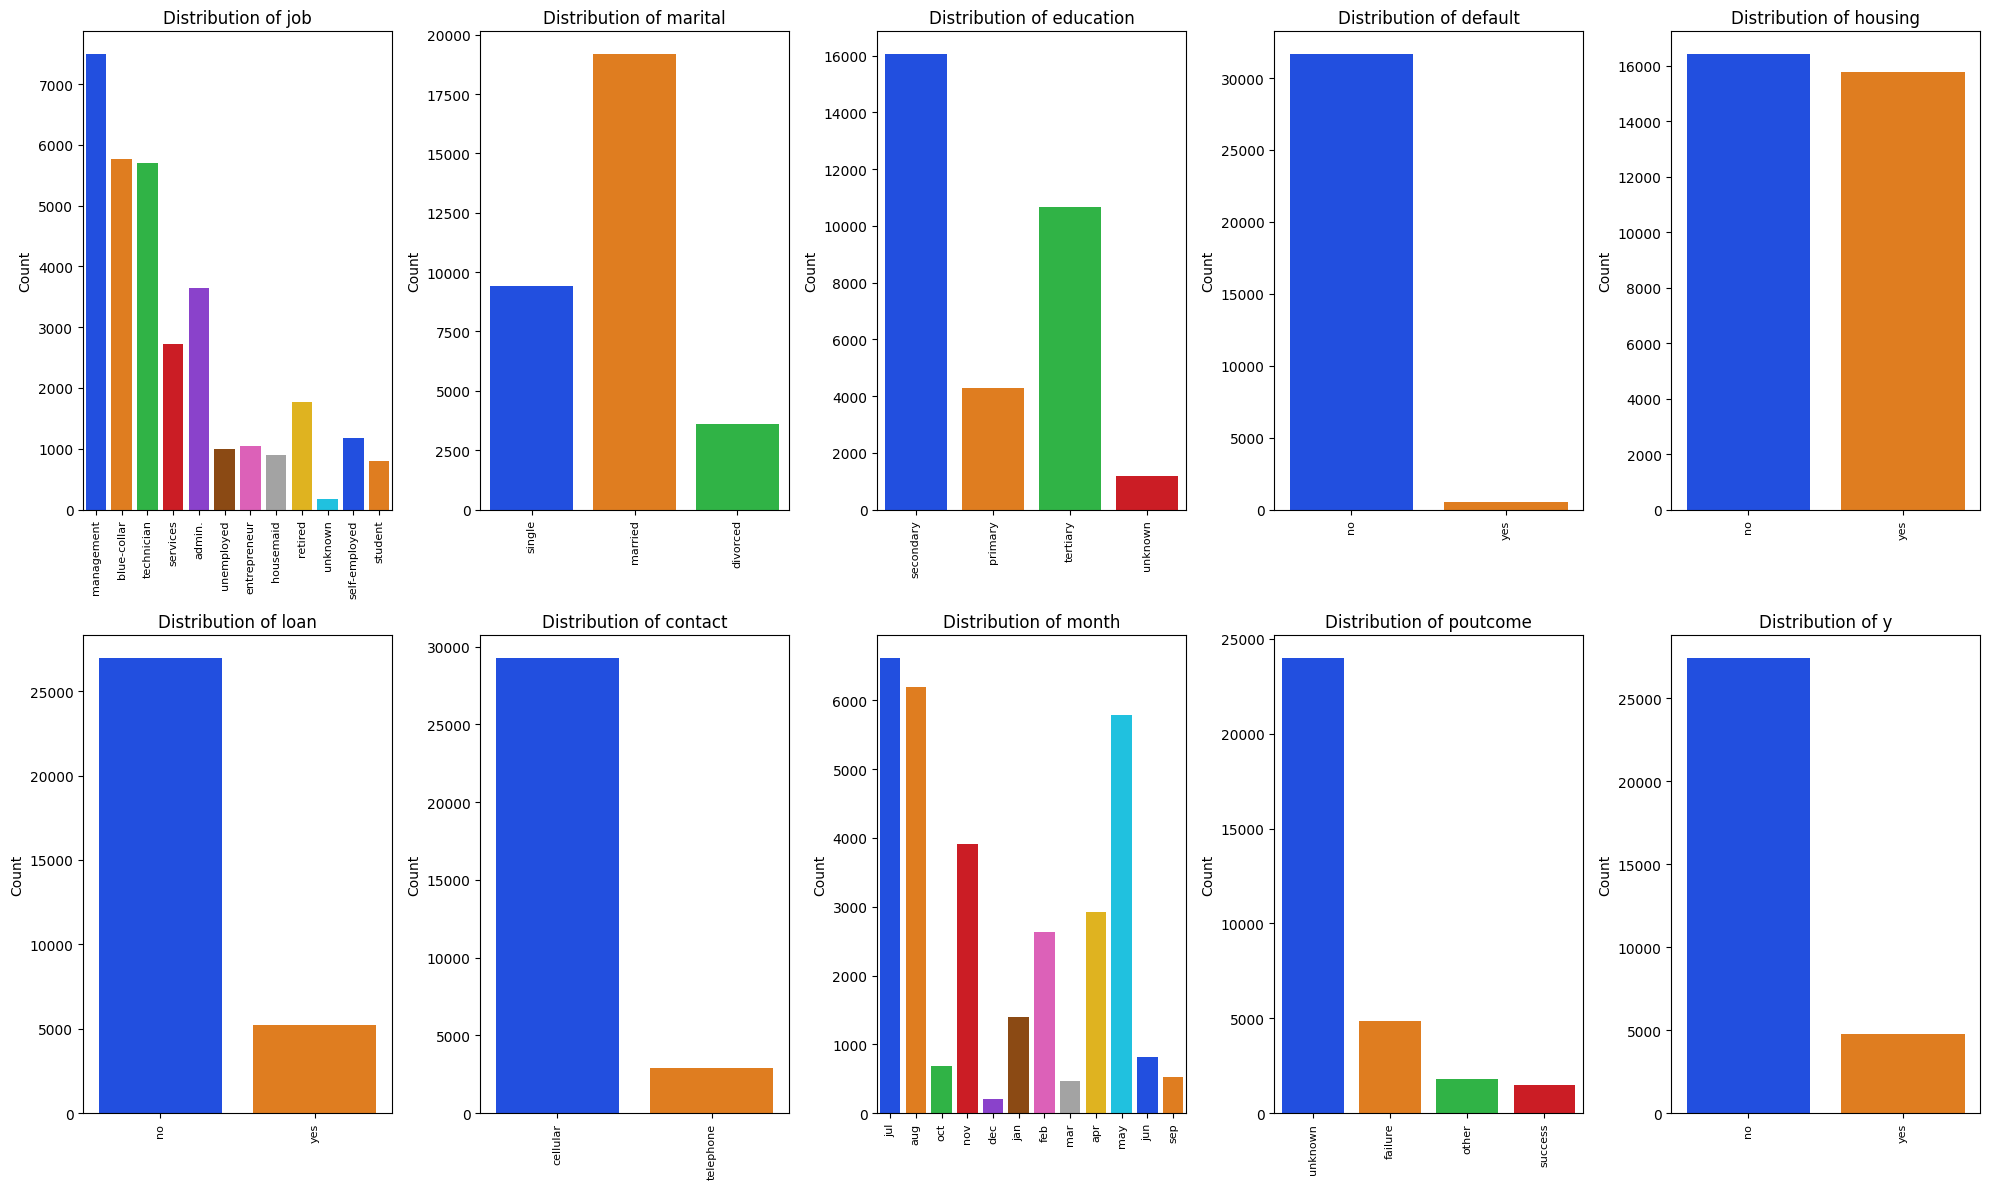

In [40]:
# Suppress FutureWarning to avoid displaying future warnings during execution
warnings.simplefilter(action='ignore', category=FutureWarning)

# Identify nominal features (columns with 'object' dtype)
nominal_features = list(col for col in bank_df_outlier.columns if bank_df_outlier[col].dtype == 'object')

# Define the number of columns and rows for subplot layout
n_cols = 5
n_rows = int(np.ceil(len(nominal_features) / n_cols)) 

# Create subplots with specified number of columns and rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*6)) 

# Flatten the axes array for ease of iteration
axes = axes.ravel() 

# Iterate through nominal features and plot countplots for each feature
for i, col in enumerate(nominal_features):
    sns.countplot(x=col, data=bank_df_outlier, ax=axes[i], palette='bright') 
    axes[i].set_title('Distribution of {}'.format(col)) 

    # Rotate x-axis labels for better readability
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=8) 

    axes[i].set_xlabel('', labelpad=10)
    axes[i].set_ylabel('Count')

# If there are empty subplot spaces, turn off their axes
if n_cols*n_rows > len(nominal_features): 
    for i in range(len(nominal_features), n_cols*n_rows):
        axes[i].axis('off')

# Adjust layout and display the plot
plt.tight_layout() 
plt.show()

As we can observe, several variables have predominant features, such as 'management' in `job` or 'secondary' in `education`. Additionally, several other variables are skewed, such as `contact`, `default`, `loan`, `poutcome`, and `y` (target variable). At this point, it is crucial to understand the extent of skewness in these variables and drop them if necessary.

In [41]:
# Create an empty DataFrame to store mode-related information
mode_prop_df = pd.DataFrame(columns=['Feature', 'Mode', 'Mode Count', 'Mode Proportion', 'Skewness'])

# Set threshold for considering skewness
threshold = 0.95

# Initialize skewness indicator
skewness = ''

# Iterate through nominal features
for col in nominal_features:
    # Find the mode of the current column
    mode = bank_df_outlier[col].mode()[0]
    
    # Count occurrences of the mode
    mode_count = bank_df_outlier[col].value_counts()[mode]
    
    # Calculate proportion of the mode
    mode_prop = mode_count / bank_df_outlier.shape[0]
    
    # Check if mode proportion exceeds the threshold
    if(mode_prop > threshold):
        skewness = 'High'
    else:
        skewness = ''
    
    # Append mode-related information to the DataFrame
    mode_prop_df.loc[len(mode_prop_df.index)] = {'Feature': col, 'Mode': mode, 'Mode Count': mode_count, 
                                                 'Mode Proportion': mode_prop * 100, 'Skewness': skewness}

# Sort DataFrame by mode proportion in descending order
mode_prop_df.sort_values(by='Mode Proportion', ascending=False)

,Feature,Mode,Mode Count,Mode Proportion,Skewness
3,default,no,31665,98.366003,High
6,contact,cellular,29285,90.972632,
9,y,no,27432,85.216365,
5,loan,no,26979,83.809139,
8,poutcome,unknown,24009,74.582958,
1,marital,married,19183,59.591190,
4,housing,no,16418,51.001833,
2,education,secondary,16053,49.867976,
0,job,management,7492,23.273586,
7,month,jul,6619,20.561648,


The only variable with significant skewness is `default`, so I'll drop it.

In [42]:
# Apart from 'default', I remove 'duration' because the dataset website suggests it.
# I also remove 'poutcome' because it's not relevant, given that almost all observations are "unknown".
bank_df_drop = bank_df_outlier.drop(columns=['default', 'duration', 'poutcome'])
bank_df_drop

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,pdays,previous,y
0,-0.705882,management,single,secondary,-0.309142,no,no,cellular,-1.000000,jul,-0.5,0.000000,0.0,no
1,0.882353,blue-collar,married,primary,-0.008374,no,no,cellular,-1.000000,jul,-0.5,0.000000,0.0,no
2,0.235294,blue-collar,married,secondary,-0.260293,no,yes,cellular,-1.000000,jul,0.0,0.000000,0.0,no
3,-0.470588,technician,single,secondary,-0.320307,no,no,telephone,-1.000000,jul,0.0,0.000000,0.0,no
4,-0.705882,technician,single,secondary,-0.245639,yes,yes,cellular,-1.000000,jul,1.0,0.000000,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,0.705882,technician,married,tertiary,0.242149,no,no,cellular,0.083333,nov,0.5,0.000000,0.0,yes
32187,1.882353,retired,divorced,primary,0.872994,no,no,cellular,0.083333,nov,0.0,0.000000,0.0,yes
32188,1.941176,retired,married,secondary,3.654571,no,no,cellular,0.083333,nov,1.5,12.758621,3.0,yes
32189,1.058824,blue-collar,married,secondary,0.132589,no,no,telephone,0.083333,nov,1.0,0.000000,0.0,no


Other than `default`, I will drop `duration` and `poutcome`. The former should be discarded according to the dataset website, as it may affect the realism of the predictive model. The latter will be dropped because almost all of its observations are "unknown", making them not useful for machine learning model building.

In [43]:
# Print the new shape of the dataset
print('The dataset has {} rows and {} columns.'.format(bank_df_drop.shape[0], bank_df_drop.shape[1]))

The dataset has 32191 rows and 14 columns.


Now I'll analyze the skewness of the numerical features.

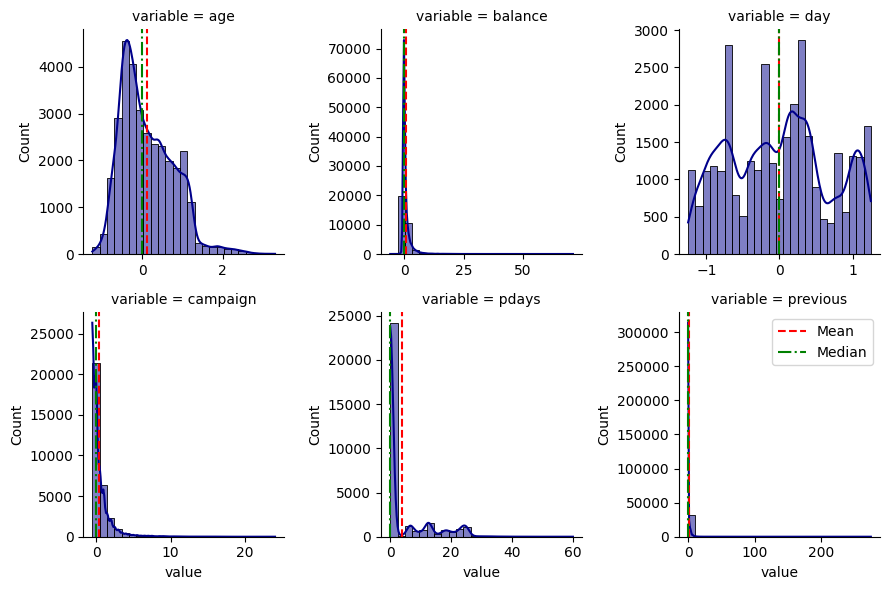

In [44]:
# Create a dataframe with only the numerical variables
df_num = bank_df_drop.select_dtypes(include=['int64', 'float64'])

# Melt the data into a long format so that you can plot the distribution of all numerical variables
melted_df = pd.melt(bank_df_drop, value_vars=df_num.columns)

# Calculate mean and median
means = melted_df.groupby('variable')['value'].mean()
medians = melted_df.groupby('variable')['value'].median()

# Plot the distribution of all numerical variables
g = sns.FacetGrid(melted_df, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", bins=25, color="darkblue", kde=True)

# Add mean and median lines to each plot
for ax, var in zip(g.axes.flat, df_num.columns):
    ax.axvline(means[var], color='red', linestyle='dashed', label='Mean')
    ax.axvline(medians[var], color='green', linestyle='dashdot', label='Median')

# Adjust layout to show legend
plt.legend()

plt.show()

In [45]:
# Create an empty DataFrame to store mode-related information
mode_prop_df = pd.DataFrame(columns=['Feature', 'Mode', 'Mode Count', 'Mode Proportion', 'Skewness'])

# Set threshold for considering skewness
threshold = 0.95

# Initialize skewness indicator
skewness = ''

# Check for outliers in numerical columns
numerical_columns = bank_df_drop.select_dtypes(include=['int64', 'float64']).columns

# Iterate through quantitative features
for col in numerical_columns:
    # Find the mode of the current column
    mode = bank_df_drop[col].mode()[0]
    
    # Count occurrences of the mode
    mode_count = bank_df_drop[col].value_counts()[mode]
    
    # Calculate proportion of the mode
    mode_prop = mode_count / bank_df_drop.shape[0]
    
    # Check if mode proportion exceeds the threshold
    if(mode_prop > threshold):
        skewness = 'High'
    else:
        skewness = ''
    
    # Append mode-related information to the DataFrame
    mode_prop_df.loc[len(mode_prop_df.index)] = {'Feature': col, 'Mode': mode, 'Mode Count': mode_count, 
                                                 'Mode Proportion': mode_prop * 100, 'Skewness': skewness}

# Sort DataFrame by mode proportion in descending order
mode_prop_df.sort_values(by='Mode Proportion', ascending=False)


,Feature,Mode,Mode Count,Mode Proportion,Skewness
4,pdays,0.000000,24004,74.567426,
5,previous,0.000000,24004,74.567426,
3,campaign,-0.500000,12340,38.333696,
1,balance,-0.333566,2643,8.210369,
2,day,0.166667,2014,6.256407,
0,age,-0.411765,1572,4.883352,


In the quantitative variables, no one has significant skweness.

In [46]:
# Convert the DataFrame to the most appropriate data types
bank_df_convert = bank_df_drop.convert_dtypes()
bank_df_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        32191 non-null  Float64
 1   job        32191 non-null  string 
 2   marital    32191 non-null  string 
 3   education  32191 non-null  string 
 4   balance    32191 non-null  Float64
 5   housing    32191 non-null  string 
 6   loan       32191 non-null  string 
 7   contact    32191 non-null  string 
 8   day        32191 non-null  Float64
 9   month      32191 non-null  string 
 10  campaign   32191 non-null  Float64
 11  pdays      32191 non-null  Float64
 12  previous   32191 non-null  Int64  
 13  y          32191 non-null  string 
dtypes: Float64(5), Int64(1), string(8)
memory usage: 3.6 MB


Now the data is ready to be visualized in order to uncover any latent patterns within them.

## **PART 2: UNDERSTAND THE DATA**

### **SECTION A: DATA VISUALIZATION**

As first thing I would like to plot again the distribution of variables.

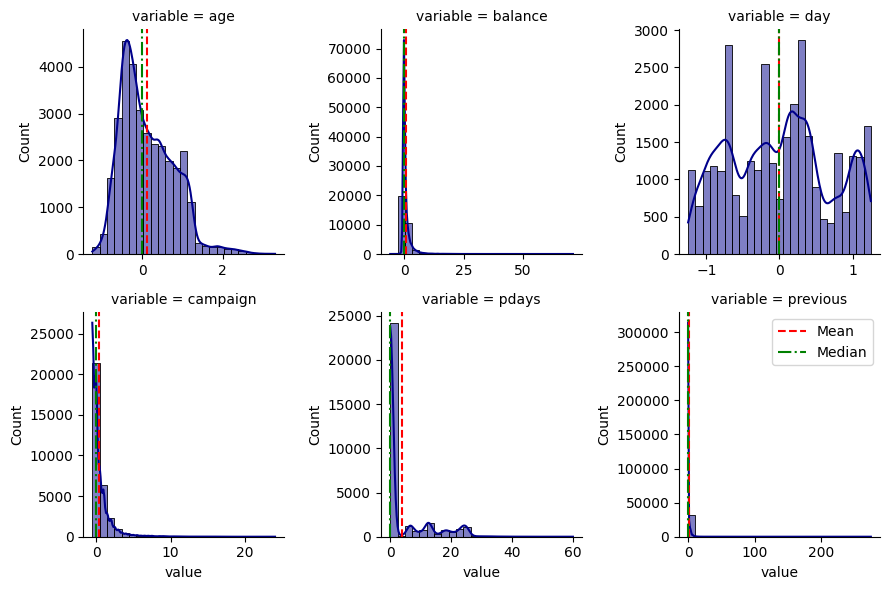

In [47]:
# Create a dataframe with only the numerical variables
df_num = bank_df_convert.select_dtypes(include=['int64', 'float64'])

# Melt the data into a long format so that you can plot the distribution of all numerical variables
melted_df = pd.melt(bank_df_convert, value_vars=df_num.columns)

# Calculate mean and median
means = melted_df.groupby('variable')['value'].mean()
medians = melted_df.groupby('variable')['value'].median()

# Plot the distribution of all numerical variables
g = sns.FacetGrid(melted_df, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", bins=25, color="darkblue", kde=True)

# Add mean and median lines to each plot
for ax, var in zip(g.axes.flat, df_num.columns):
    ax.axvline(means[var], color='red', linestyle='dashed', label='Mean')
    ax.axvline(medians[var], color='green', linestyle='dashdot', label='Median')

# Adjust layout to show legend
plt.legend()

plt.show()

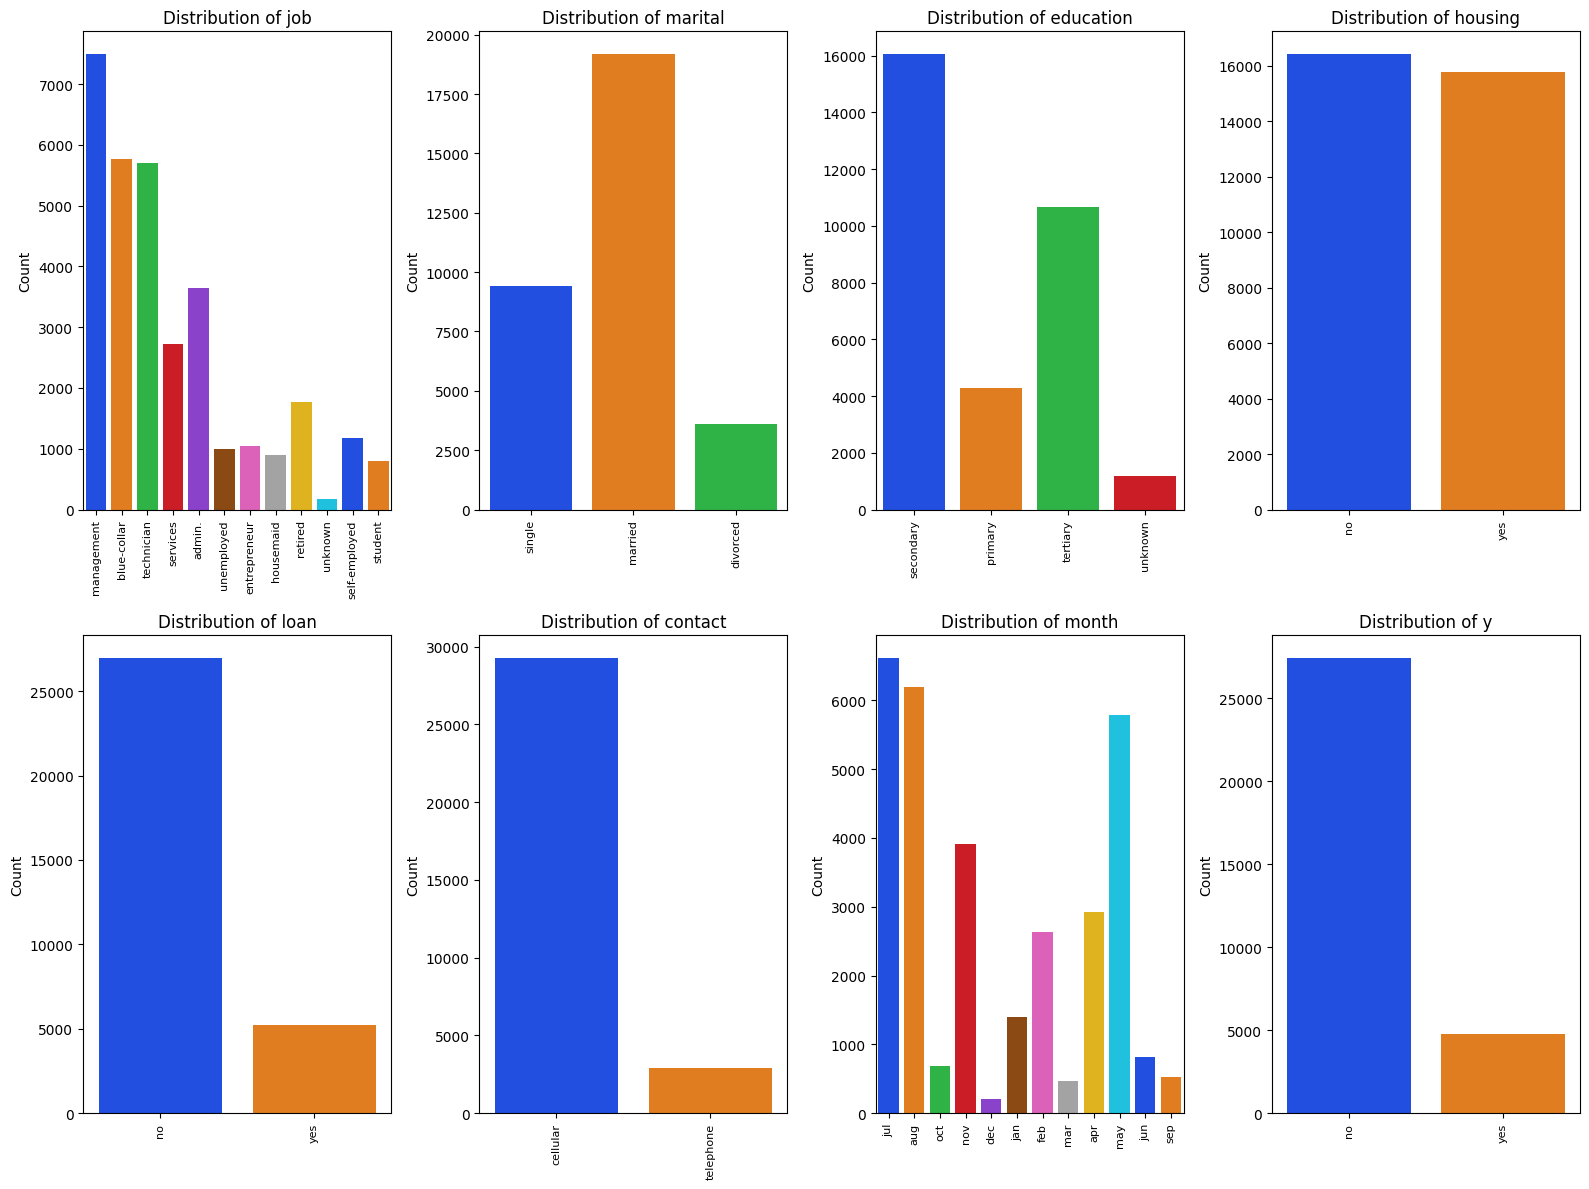

In [48]:
# Suppress FutureWarning to avoid displaying future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# First, select the nominal features from the DataFrame
nominal_features = list(col for col in bank_df_convert.columns if bank_df_convert[col].dtype == 'string')

# Plot the distribution of each nominal feature in subplots
n_cols = 4  # Number of columns for subplots
n_rows = int(np.ceil(len(nominal_features) / n_cols))  # Calculate number of rows needed

# Create subplots figure with appropriate size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*6)) 
# Flatten the axes array to 1-dimensional
axes = axes.ravel() 
for i, col in enumerate(nominal_features):
    # Plot countplot for each feature
    sns.countplot(x=col, data=bank_df_convert, ax=axes[i], palette='bright') 
    axes[i].set_title('Distribution of {}'.format(col))  # Set subplot title
    # Set smaller font size and rotate x-tick labels
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=8) 
    # Remove x-axis label and set label padding
    axes[i].set_xlabel('', labelpad=10)
    axes[i].set_ylabel('Count')

# If there are more subplots than features, hide the empty subplots
if n_cols*n_rows > len(nominal_features): 
    for i in range(len(nominal_features), n_cols*n_rows):
        axes[i].axis('off')

# Adjust subplot layout to fill the figure area
plt.tight_layout() 
# Display the plot
plt.show()


Next, it's necessary to explore the relationship between the target variable and the independent variables.

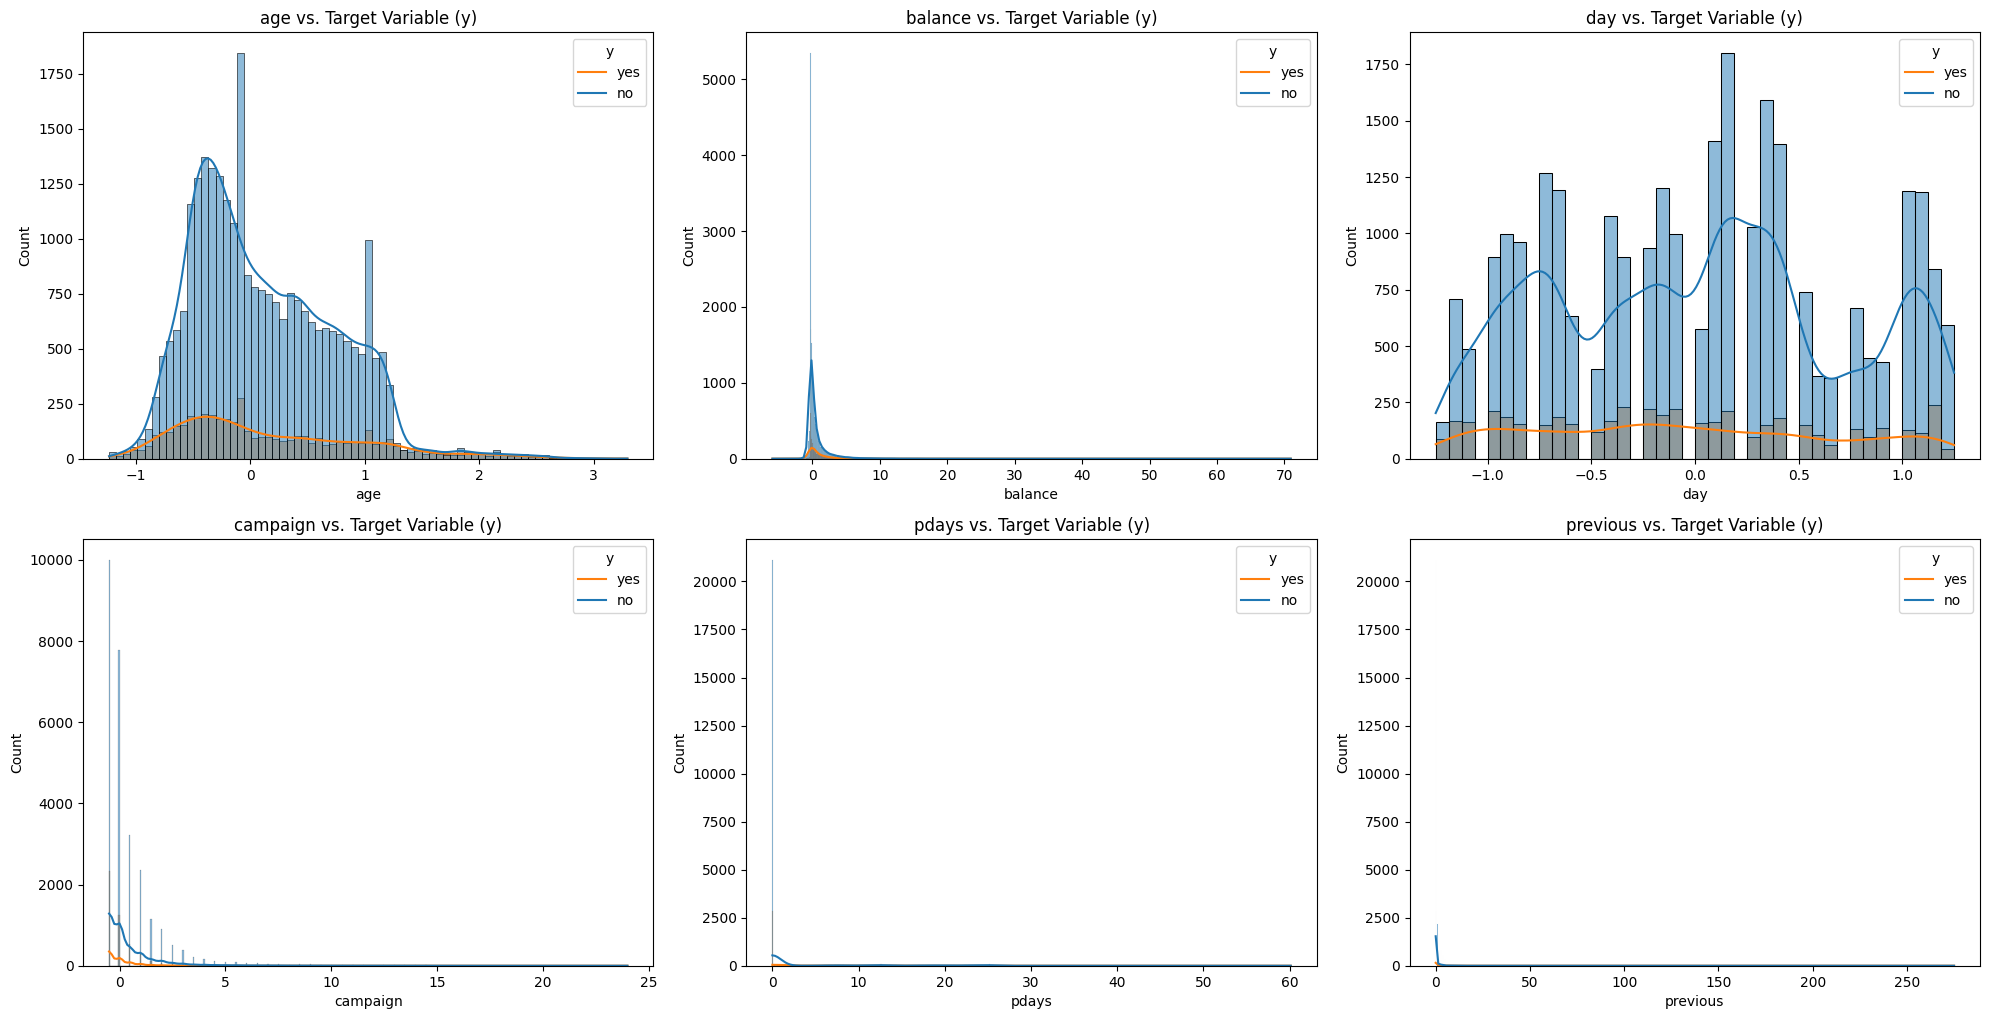

In [49]:
# Assuming quantitative_columns is a list of quantitative column names from bank_df_convert
quantitative_columns = bank_df_convert.select_dtypes(include=['int64', 'float64']).columns

# Create a figure with a specific size
plt.figure(figsize=(20, 20))

# Iterate over each quantitative column
for i, col in enumerate(quantitative_columns):
    # Create a subplot for each column
    plt.subplot(4, 3, i+1)
    
    # Plot a histogram for the current column with KDE (Kernel Density Estimate)
    sns.histplot(x=col, hue='y', data=bank_df_convert, kde=True)
    
    # Set title for the subplot
    plt.title(f'{col} vs. Target Variable (y)')
    
    # Set labels for x-axis and y-axis
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Get legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    
    # Check if labels exist (to avoid errors)
    if labels:
        # Add legend with the target variable values
        plt.legend(title='y', loc='upper right')
    else:
        # If no labels, add a dummy legend to avoid errors
        plt.legend(['yes', 'no'], title='y', loc='upper right')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()


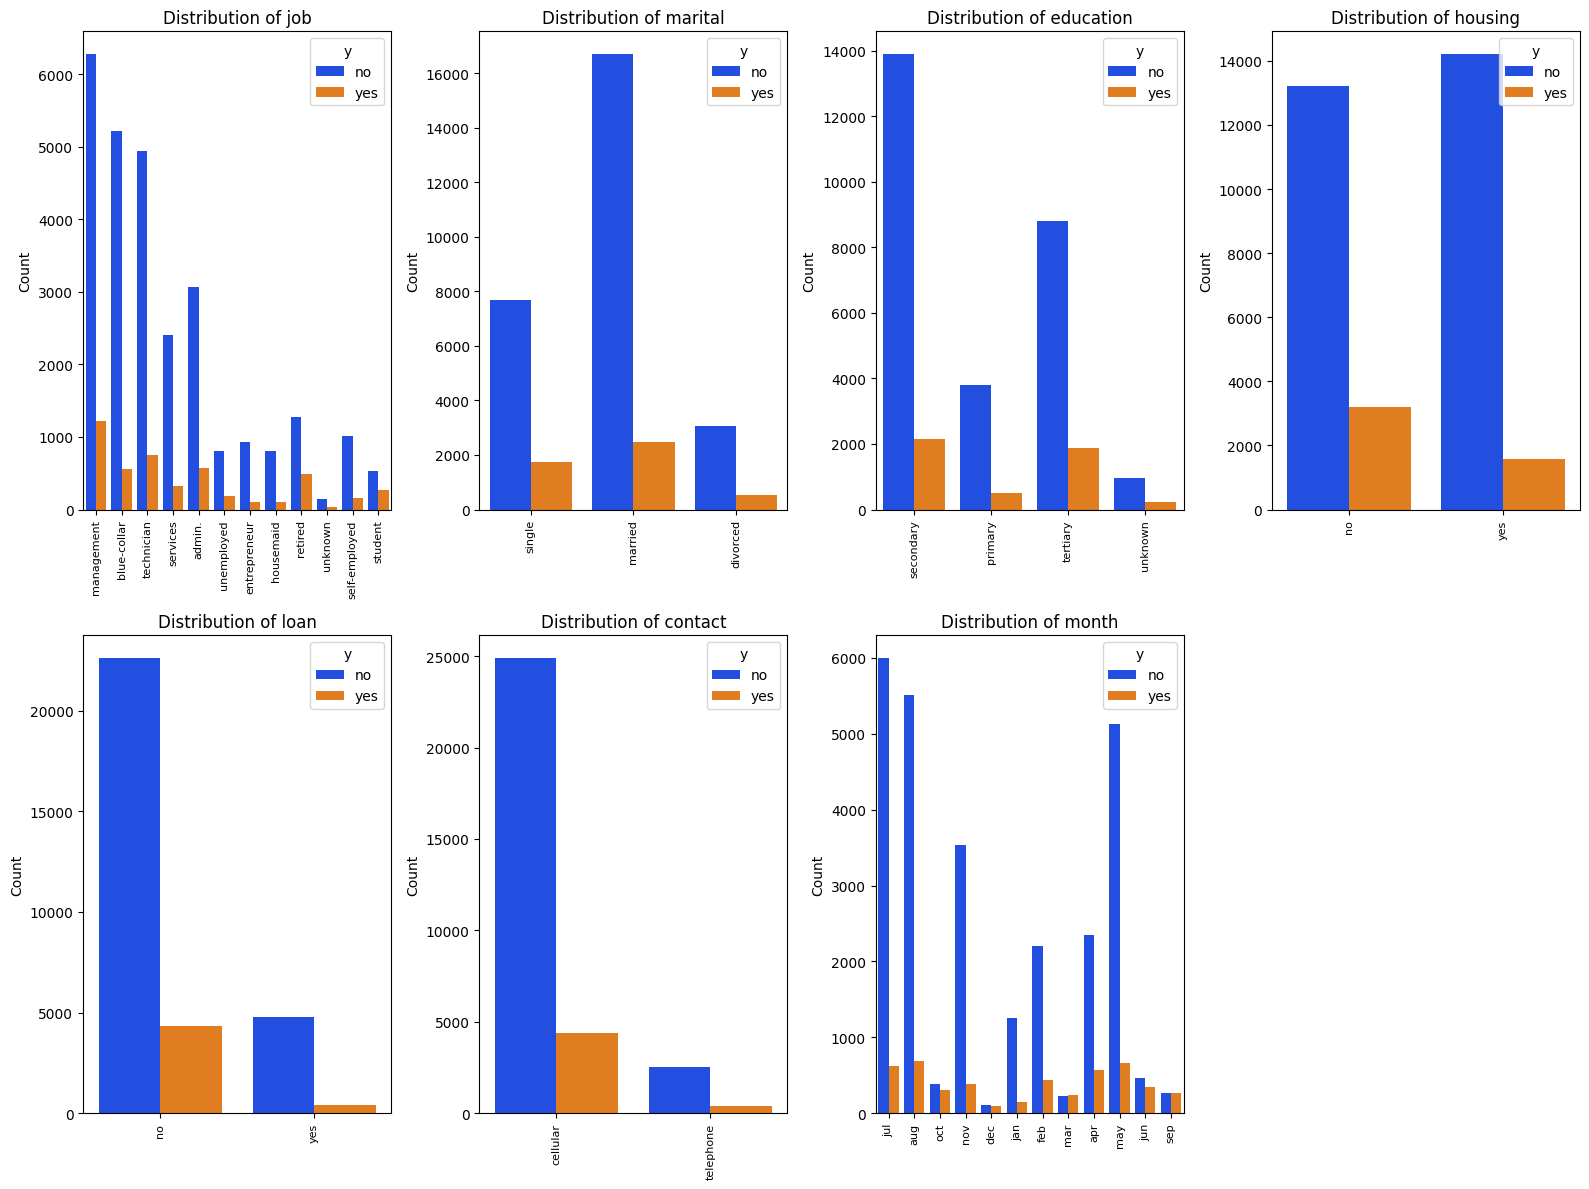

In [50]:
# First, I select the nominal features
nominal_features = [col for col in bank_df_convert.columns if bank_df_convert[col].dtype == 'string' and col != 'y']

# Calculate the number of columns and rows for the subplot grid
n_cols = 4 
n_rows = int(np.ceil(len(nominal_features) / n_cols)) 

# Create the figure and subplot axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*6)) 
# Flatten the axes grid into a 1-dimensional array
axes = axes.ravel() 

# Iterate over each nominal feature
for i, col in enumerate(nominal_features):
    # Plot the distribution of each nominal feature with hue=y
    sns.countplot(x=col, hue='y', data=bank_df_convert, ax=axes[i], palette='bright') 
    axes[i].set_title('Distribution of {}'.format(col)) 
    # Rotate x-axis labels and reduce font size
    plt.setp(axes[i].get_xticklabels(), rotation=90, fontsize=8) 
    # Remove x-axis label and set label padding
    axes[i].set_xlabel('', labelpad=10)
    axes[i].set_ylabel('Count')

# If there are more subplots than features to plot, hide empty subplots
if n_cols * n_rows > len(nominal_features): 
    for i in range(len(nominal_features), n_cols * n_rows):
        axes[i].axis('off')

# Adjust subplot layout to fill the figure area
plt.tight_layout() 
plt.show()


As we can observe, each independent variable is skewed for the 'no' class in the target variable. This could pose a problem in the machine learning phase, as the model may struggle to accurately predict the target variable. Additionally, I will need to prioritize achieving accurate predictions for the 'yes' class.

Now I'll further investigate the relation between variables with some graphical representations.

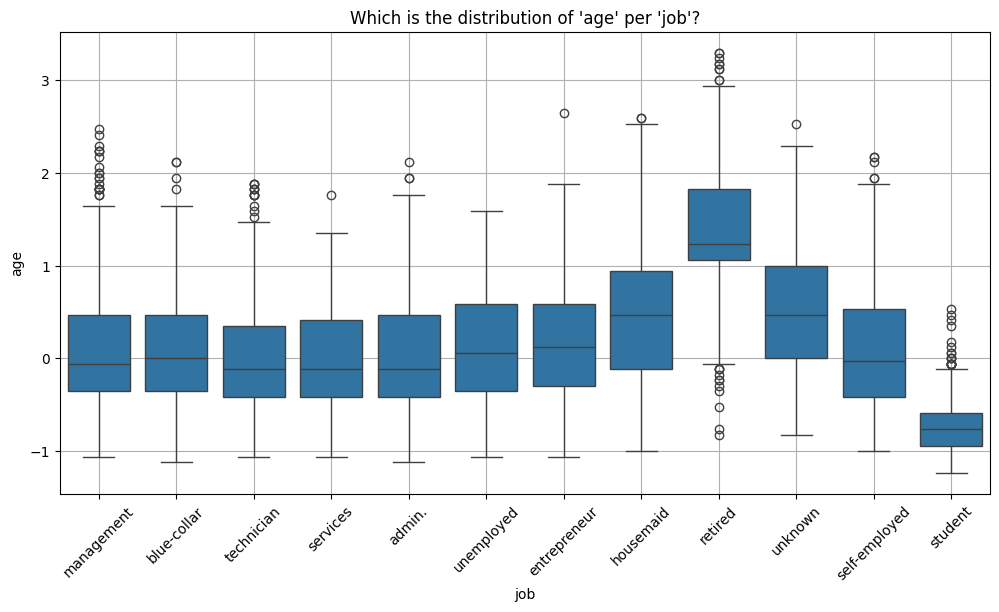

In [51]:
plt.figure(figsize=(12, 6))

# Create a boxplot of age per job
sns.boxplot(x='job', y='age', data=bank_df_convert)

# Set title of the plot
plt.title('Which is the distribution of \'age\' per \'job\'?')

# Set labels for x-axis and y-axis
plt.xlabel('job')
plt.ylabel('age')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


In the distribution of age per job, we can observe that retirees tend to be older, while students tend to be younger. There are several outliers, particularly for the retired feature.

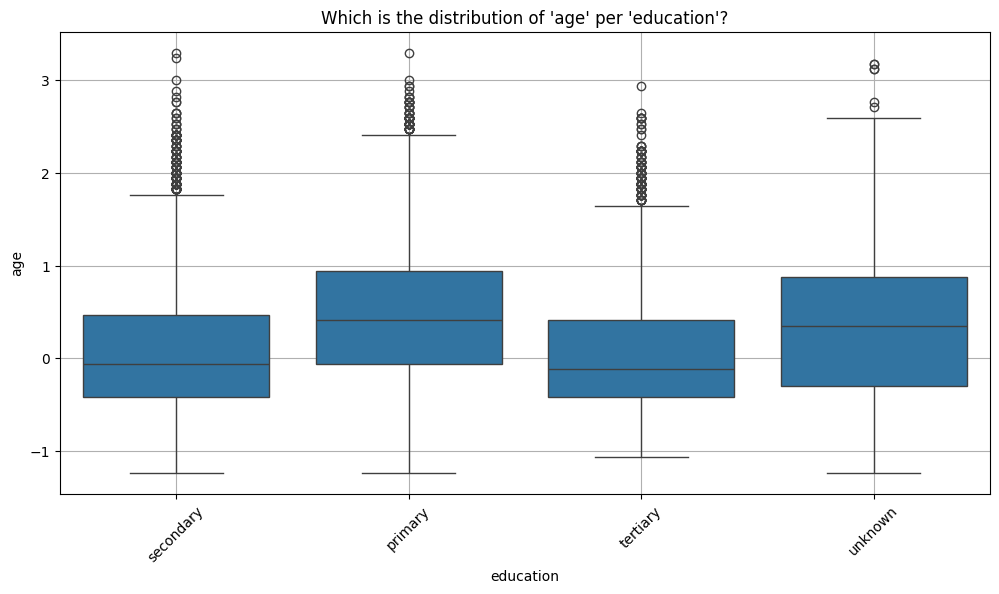

In [52]:
plt.figure(figsize=(12, 6))

# Create a boxplot of age per education
sns.boxplot(x='education', y='age', data=bank_df_convert)

# Set title of the plot
plt.title('Which is the distribution of \'age\' per \'education\'?')

# Set labels for x-axis and y-axis
plt.xlabel('education')
plt.ylabel('age')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()

In the distribution of age per education, we can observe that there are generally several outliers, particularly in the 'secondary' feature. Additionally, we can see that the higher the education level, the younger the people who have attained that level tend to be.

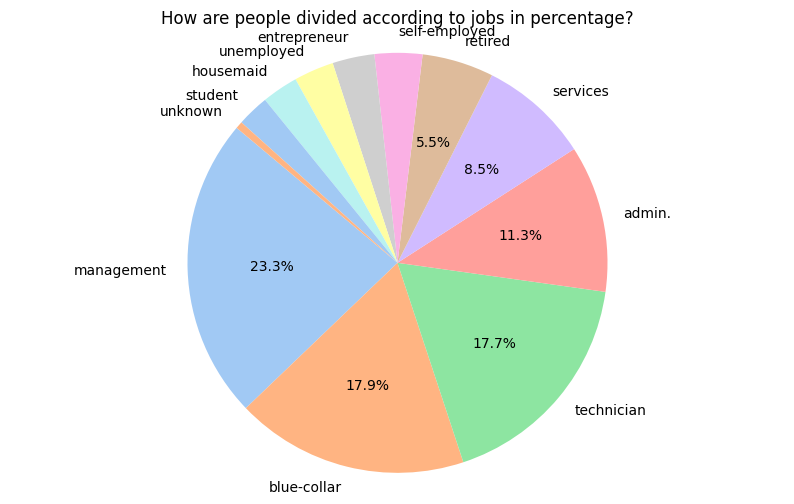

In [53]:
# Calculate the percentages of features within the 'job' column
job_percentages = bank_df_convert['job'].value_counts(normalize=True) * 100

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(job_percentages, labels=job_percentages.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '', startangle=140, colors=sns.color_palette('pastel'))
plt.title('How are people divided according to jobs in percentage?')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In this pie plot, it is highlighted that 'blue-collar', 'management', and 'technician' are the largest categories present in the dataset, accounting cumulatively for 59.2%.

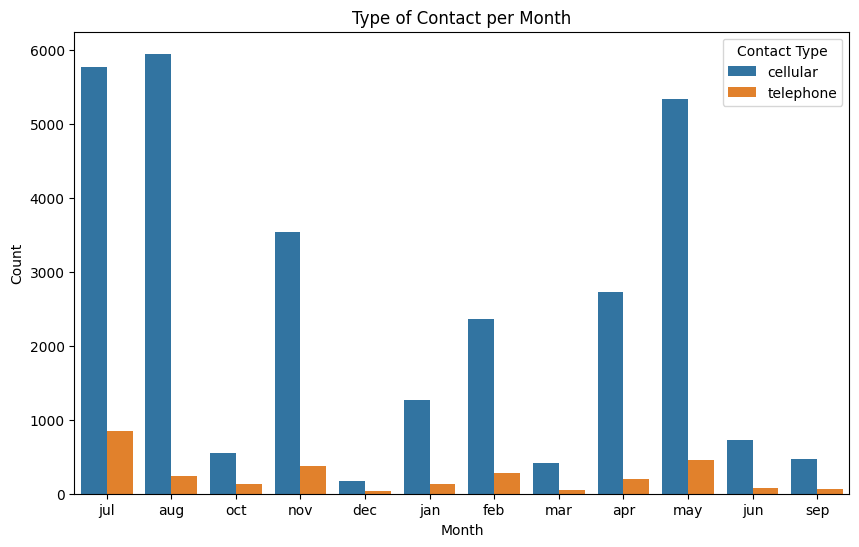

In [54]:
# Plotting a count plot to visualize the distribution of contact types across months
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='month', hue='contact', data=bank_df_convert)  # Plot the count of contact types by month
plt.title('Type of Contact per Month')  # Set the title of the plot
plt.xlabel('Month')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.legend(title='Contact Type')  # Add a legend with the title 'Contact Type'
plt.show()  # Display the plot


The data clearly shows that the majority of contacts occurred in August via cellular. This is followed by June and May, with cellular being the most common method of contacting clients in both months.

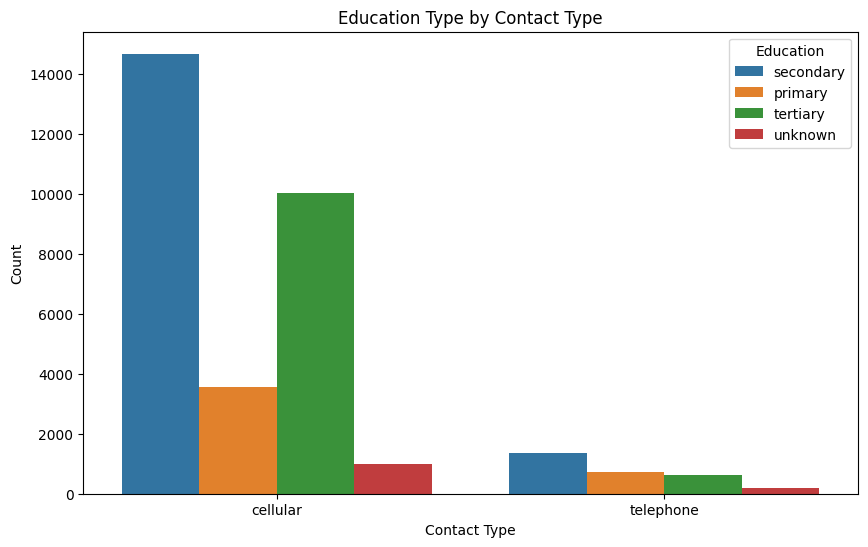

In [55]:
# Plotting a count plot to visualize the distribution of education types by contact type
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='contact', hue='education', data=bank_df_convert)  # Plot the count of education types by contact type
plt.title('Education Type by Contact Type')  # Set the title of the plot
plt.xlabel('Contact Type')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.legend(title='Education')  # Add a legend with the title 'Education'
plt.show()  # Display the plot


In this graph, it's obvious, especially considering previous graphs, that the majority of contacts were made via cellular and among people with secondary education.

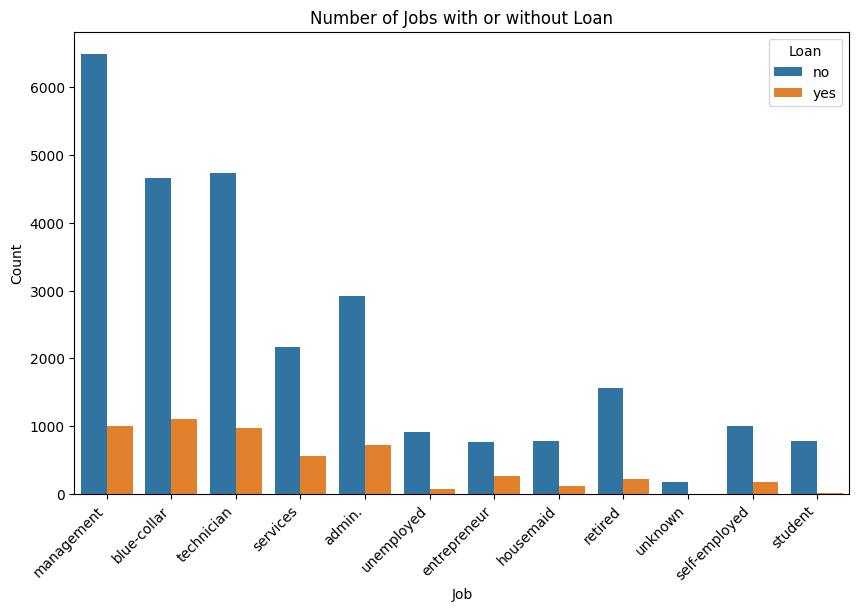

In [56]:
# Plotting a count plot to visualize the distribution of jobs with or without loans
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='job', hue='loan', data=bank_df_convert)  # Plot the count of jobs with or without loans
plt.title('Number of Jobs with or without Loan')  # Set the title of the plot
plt.xlabel('Job')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.legend(title='Loan')  # Add a legend with the title 'Loan'
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


Talking about loans, the majority of them are borne by 'management', 'blue-collar', and 'technician', which are the most common jobs in the dataset. Additionally, these jobs are strongly skewed towards not having personal loans, with very few of them with personal loan.

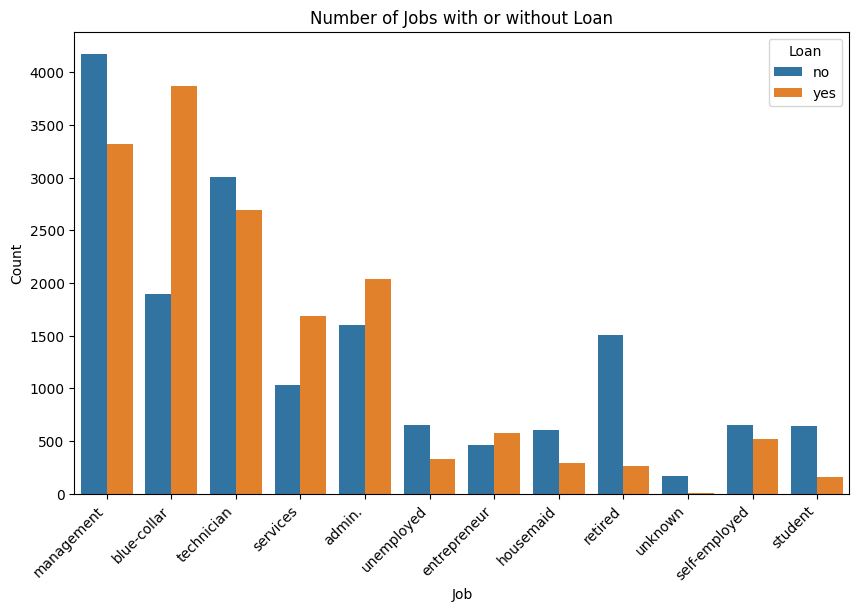

In [57]:
# Plotting a count plot to visualize the distribution of jobs with or without loans
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='job', hue='housing', data=bank_df_convert)  # Plot the count of jobs with or without loans
plt.title('Number of Jobs with or without Loan')  # Set the title of the plot
plt.xlabel('Job')  # Set the label for the x-axis
plt.ylabel('Count')  # Set the label for the y-axis
plt.legend(title='Loan')  # Add a legend with the title 'Loan'
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


In terms of housing loans, the trend differs from personal loans.'blue-collar' constitute the category with the highest number of housing loans. However, both 'management' and 'technician' show a relatively even distribution between having and not having a housing loan, reducing the skewness.

### **SECTION B: DATA CORRELATION**

Now I'll investigate the correlation between quantitative variables.

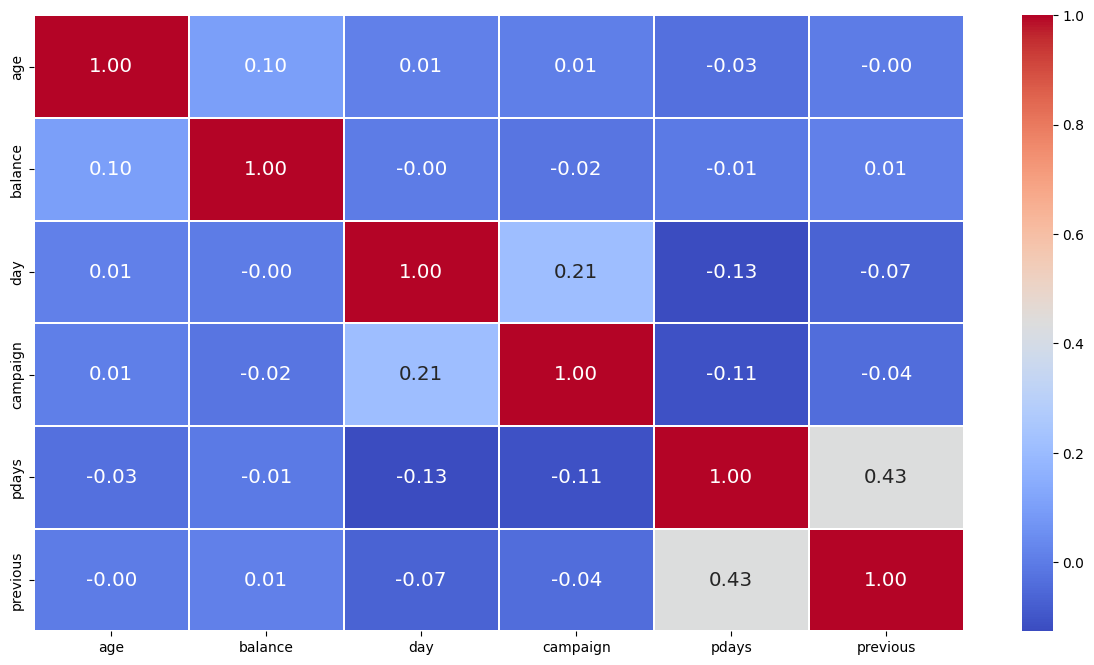

In [58]:
# Selecting numeric columns from the DataFrame
numeric_df = bank_df_convert.select_dtypes(include=[np.number])

# Creating a heatmap to visualize the correlation matrix of numeric columns
plt.figure(figsize=(15,8))

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(numeric_df.corr()))})

plt.show()

In [59]:
# Selecting numeric columns from the DataFrame
numeric_df = bank_df_convert.select_dtypes(include=[np.number])

# Calculating correlations between numeric columns and sorting them
df_c = numeric_df.corr().unstack().sort_values(ascending=False).drop_duplicates()

# Printing the top 5 correlations
for i, j in df_c[df_c < 1].head(5).items():
    print('The correlation between {} and {} is {}'.format(i[0], i[1], j))

The correlation between previous and pdays is 0.4337751074622936
The correlation between campaign and day is 0.2117350113781285
The correlation between balance and age is 0.10006372436089192
The correlation between day and age is 0.013968050650640124
The correlation between previous and balance is 0.012571135668050284


In [60]:
bank_df_convert.drop('pdays', axis=1, inplace=True)

In [61]:
# Selecting numeric columns from the DataFrame
numeric_df = bank_df_convert.select_dtypes(include=[np.number])

# Calculating correlations between numeric columns and sorting them in ascending order
df_c = numeric_df.corr().unstack().sort_values(ascending=True).drop_duplicates()

# Printing the top 5 correlations
for i, j in df_c[df_c < 1].head(5).items():
    print('The correlation between {} and {} is {}'.format(i[0], i[1], j))

The correlation between previous and day is -0.06892991781313004
The correlation between campaign and previous is -0.038550810758277855
The correlation between campaign and balance is -0.02053322047163165
The correlation between balance and day is -0.002349102705123435
The correlation between previous and age is -0.0015721743284038796


The only correlation that could be problematic is between `pdays` and `previous`. This is trivial because both of them provide temporal information about the last marketing campaign. I dropped `pdays` to avoid this complication.

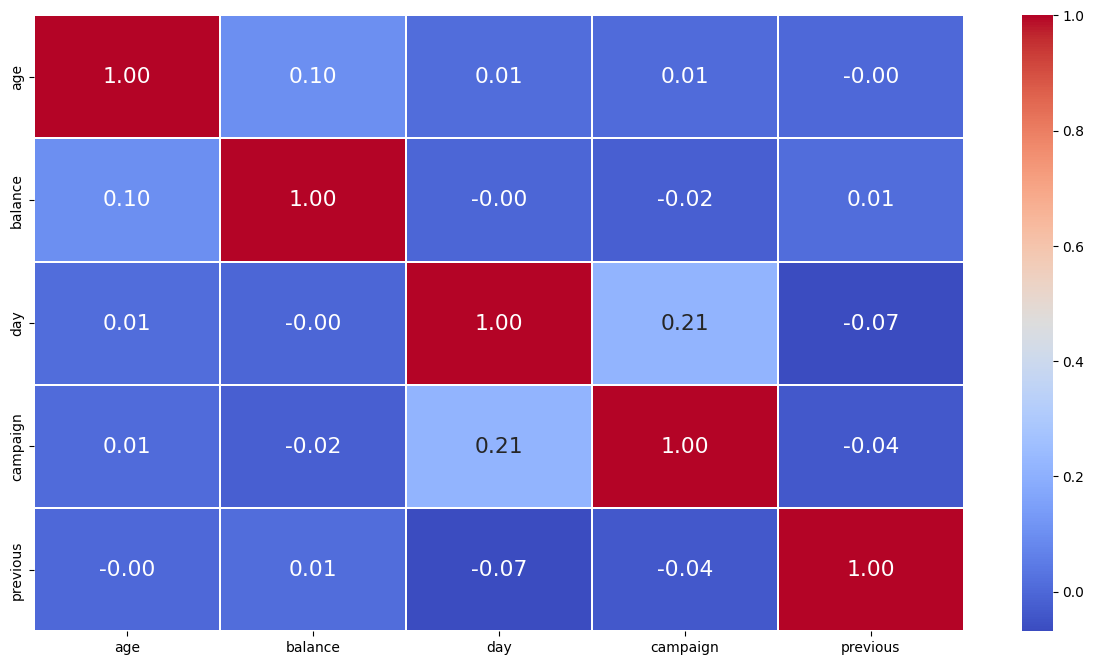

In [62]:
# Selecting numeric columns from the DataFrame
numeric_df = bank_df_convert.select_dtypes(include=[np.number])

# Creating a heatmap to visualize the correlation matrix of numeric columns
plt.figure(figsize=(15,8))

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 35 / np.sqrt(len(numeric_df.corr()))})

plt.show()

## **PART 3: FEATURE ENGINEERING**

### **SECTION A: DATA MODIFICATION**

Before encoding the data, I need to determine the type of feature for each variable.

In [63]:
# Iterating through each column in the DataFrame
for column in bank_df_convert.columns:
    # Getting unique values in the column
    unique_values = bank_df_convert[column].unique()
    # Printing unique values for the column
    print(f"Unique values in column '{column}':")
    print(unique_values) 
    print()

Unique values in column 'age':
<FloatingArray>
[  -0.7058823529411765,    0.8823529411764706,   0.23529411764705882,
  -0.47058823529411764,   -0.6470588235294118,    0.6470588235294118,
   -0.5882352941176471,   -0.8235294117647058, -0.058823529411764705,
  -0.17647058823529413,   -0.4117647058823529,   0.29411764705882354,
  -0.11764705882352941,    0.5294117647058824,   -0.5294117647058824,
  -0.35294117647058826,  -0.29411764705882354,  -0.23529411764705882,
    0.5882352941176471,    0.9411764705882353,    0.7058823529411765,
    1.1764705882352942,    1.2352941176470589,    0.8235294117647058,
   0.47058823529411764,                   0.0,                   1.0,
   0.11764705882352941,    1.1176470588235294,    0.4117647058823529,
    0.7647058823529411,   0.35294117647058826,   0.17647058823529413,
  0.058823529411764705,    1.0588235294117647,   -0.7647058823529411,
    1.2941176470588236,   -0.8823529411764706,   -0.9411764705882353,
                  -1.0,     1.5882352941176

Variables `housing`, `loan`, and `y` are binary categorical variables. Therefore, I can use a label encoding as 0 (no) or 1 (yes) within the variable without creating any dummy variables.

In [64]:
bank_df_encoded = bank_df_convert

# Apply a label encoding by mapping 'housing' and 'y' from yes/no to 1/0
bank_df_encoded['housing'] = bank_df_encoded['housing'].map({'yes': 1, 'no': 0})
bank_df_encoded['loan'] = bank_df_encoded['loan'].map({'yes': 1, 'no': 0})
bank_df_encoded['y'] = bank_df_encoded['y'].map({'yes': 1, 'no': 0})

bank_df_encoded

,age,job,marital,education,balance,housing,loan,contact,day,month,campaign,previous,y
0,-0.705882,management,single,secondary,-0.309142,0,0,cellular,-1.0,jul,-0.5,0,0
1,0.882353,blue-collar,married,primary,-0.008374,0,0,cellular,-1.0,jul,-0.5,0,0
2,0.235294,blue-collar,married,secondary,-0.260293,0,1,cellular,-1.0,jul,0.0,0,0
3,-0.470588,technician,single,secondary,-0.320307,0,0,telephone,-1.0,jul,0.0,0,0
4,-0.705882,technician,single,secondary,-0.245639,1,1,cellular,-1.0,jul,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,0.705882,technician,married,tertiary,0.242149,0,0,cellular,0.083333,nov,0.5,0,1
32187,1.882353,retired,divorced,primary,0.872994,0,0,cellular,0.083333,nov,0.0,0,1
32188,1.941176,retired,married,secondary,3.654571,0,0,cellular,0.083333,nov,1.5,3,1
32189,1.058824,blue-collar,married,secondary,0.132589,0,0,telephone,0.083333,nov,1.0,0,0


On the other hand, all the other categorical variables need to be encoded by creating dummy variables since they have more than two features. I will use the OneHotEncoder, which is a class in sklearn that automatically provides one-hot encoding while considering the dummy variable trap.

In [65]:
# Select columns with 'object' data type as they need to be encoded
categorical_cols = [col for col in bank_df_encoded.columns if bank_df_encoded[col].dtype == 'string']

# Initialize the encoder
onehot_encoder = OneHotEncoder(sparse_output=False, dtype='int', drop='first')

for column in categorical_cols:
    # Transform the categorical column into a two-dimensional array
    column_data = bank_df_encoded[column].values.reshape(-1, 1)
    
    # Encode the data
    encoded_data = onehot_encoder.fit_transform(column_data)
    col_names = onehot_encoder.get_feature_names_out([column])
    
    # Create a DataFrame with the new encoded data and specify column names
    encoded_df = pd.DataFrame(encoded_data, columns=col_names)
    
    # Add the new columns to the DataFrame
    bank_df_encoded = pd.concat([bank_df_encoded, encoded_df], axis=1)
    
    # Drop the original column
    bank_df_encoded.drop(column, axis=1, inplace=True)

bank_df_encoded


,age,balance,housing,loan,day,campaign,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-0.705882,-0.309142,0,0,-1.0,-0.5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.882353,-0.008374,0,0,-1.0,-0.5,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.235294,-0.260293,0,1,-1.0,0.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.470588,-0.320307,0,0,-1.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.705882,-0.245639,1,1,-1.0,1.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,0.705882,0.242149,0,0,0.083333,0.5,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32187,1.882353,0.872994,0,0,0.083333,0.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32188,1.941176,3.654571,0,0,0.083333,1.5,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32189,1.058824,0.132589,0,0,0.083333,1.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


Now, I'll proceed to find the correlation between all the variables.

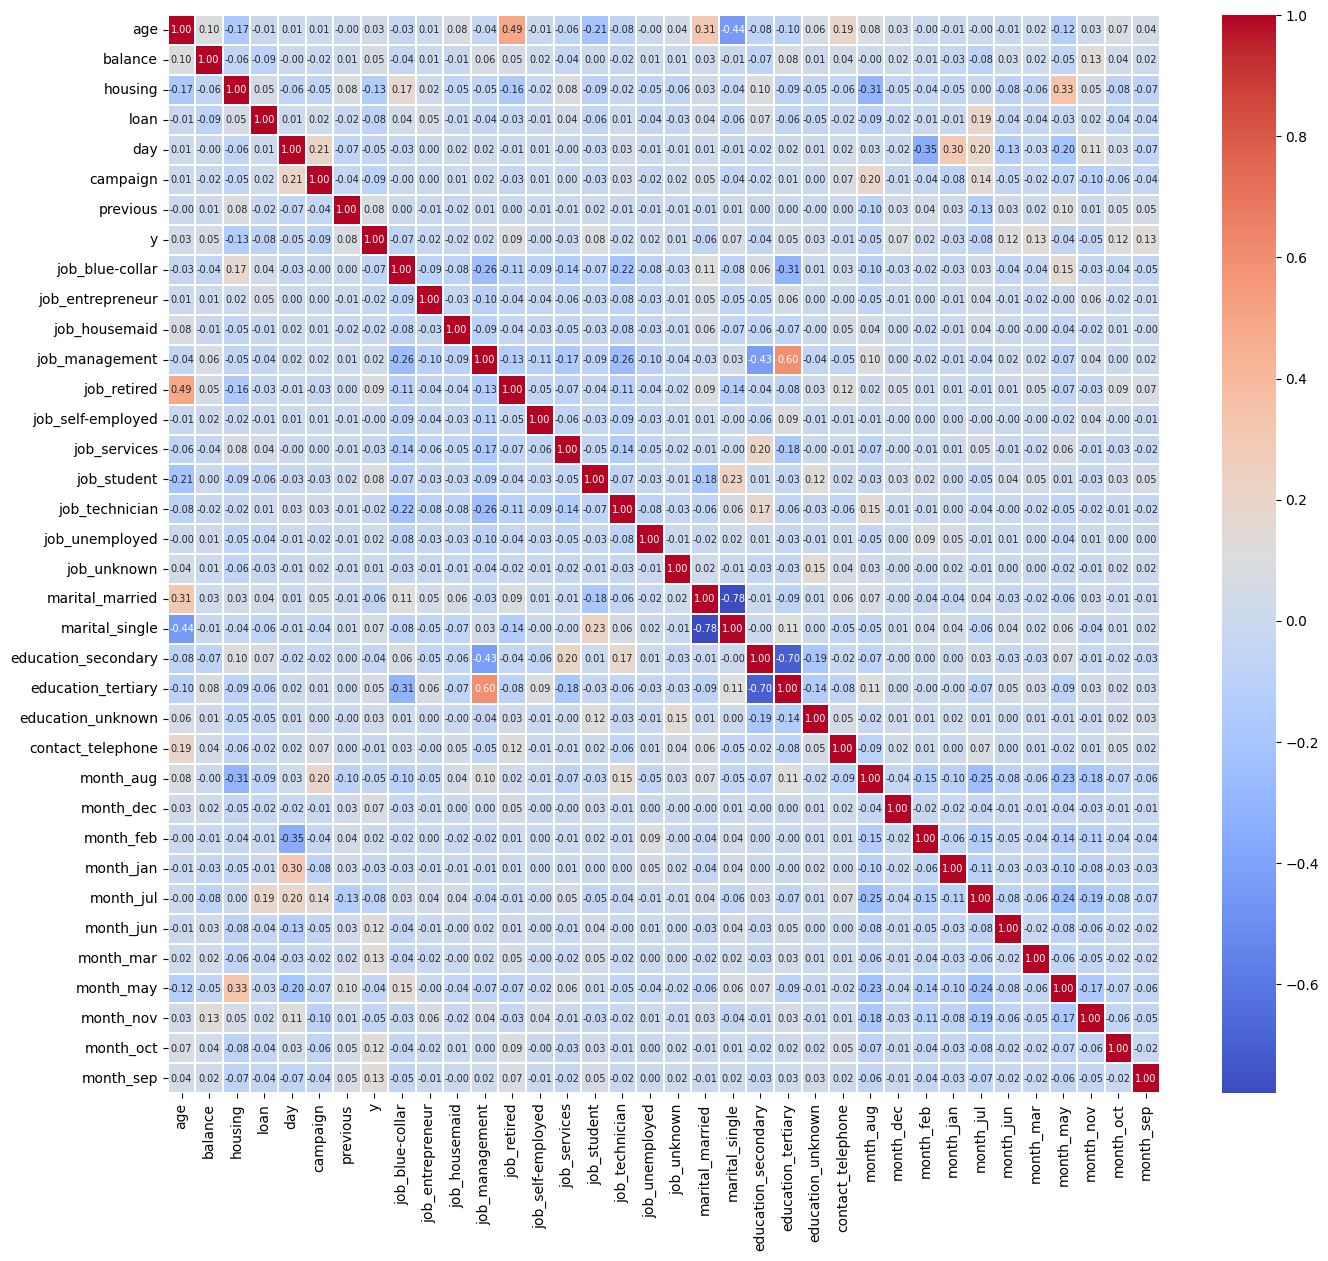

In [66]:
plt.figure(figsize=(16,14))

# Creating a heatmap to visualize the correlation matrix of numeric columns
sns.heatmap(bank_df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 7})

plt.show()

In [67]:
# Calculating correlations between numeric columns and sorting them
df_c = bank_df_encoded.corr().unstack().sort_values(ascending=False).drop_duplicates()

# Printing the top 5 correlations
for i, j in df_c[df_c < 1].head(5).items():
    print('The correlation between {} and {} is {}'.format(i[0], i[1], j))

The correlation between job_management and education_tertiary is 0.5998835570651925
The correlation between age and job_retired is 0.4893089342322744
The correlation between housing and month_may is 0.33449324596088675
The correlation between age and marital_married is 0.306038354940752
The correlation between month_jan and day is 0.29834428819939546


In [68]:
bank_df_encoded.drop(['education_tertiary', 'job_retired'], axis=1, inplace=True)

In [69]:
# Calculating correlations between numeric columns and sorting them
df_c = bank_df_encoded.corr().unstack().sort_values(ascending=True).drop_duplicates()

# Printing the top 5 correlations
for i, j in df_c[df_c < 1].head(5).items():
    print('The correlation between {} and {} is {}'.format(i[0], i[1], j))

The correlation between marital_single and marital_married is -0.7805379547879041
The correlation between marital_single and age is -0.4442375343542021
The correlation between job_management and education_secondary is -0.4285955896192472
The correlation between month_feb and day is -0.3509534768069884
The correlation between housing and month_aug is -0.3065630127299143


In [70]:
bank_df_encoded.drop(['marital_single', 'job_management'], axis=1, inplace=True)

I've decided to drop `education_tertiary`, `job_retired`, `marital_single`, `job_management`, because they are highly correlated with other variables. This means they explain variance of other variables too, which could create problems with machine learning algorithms.

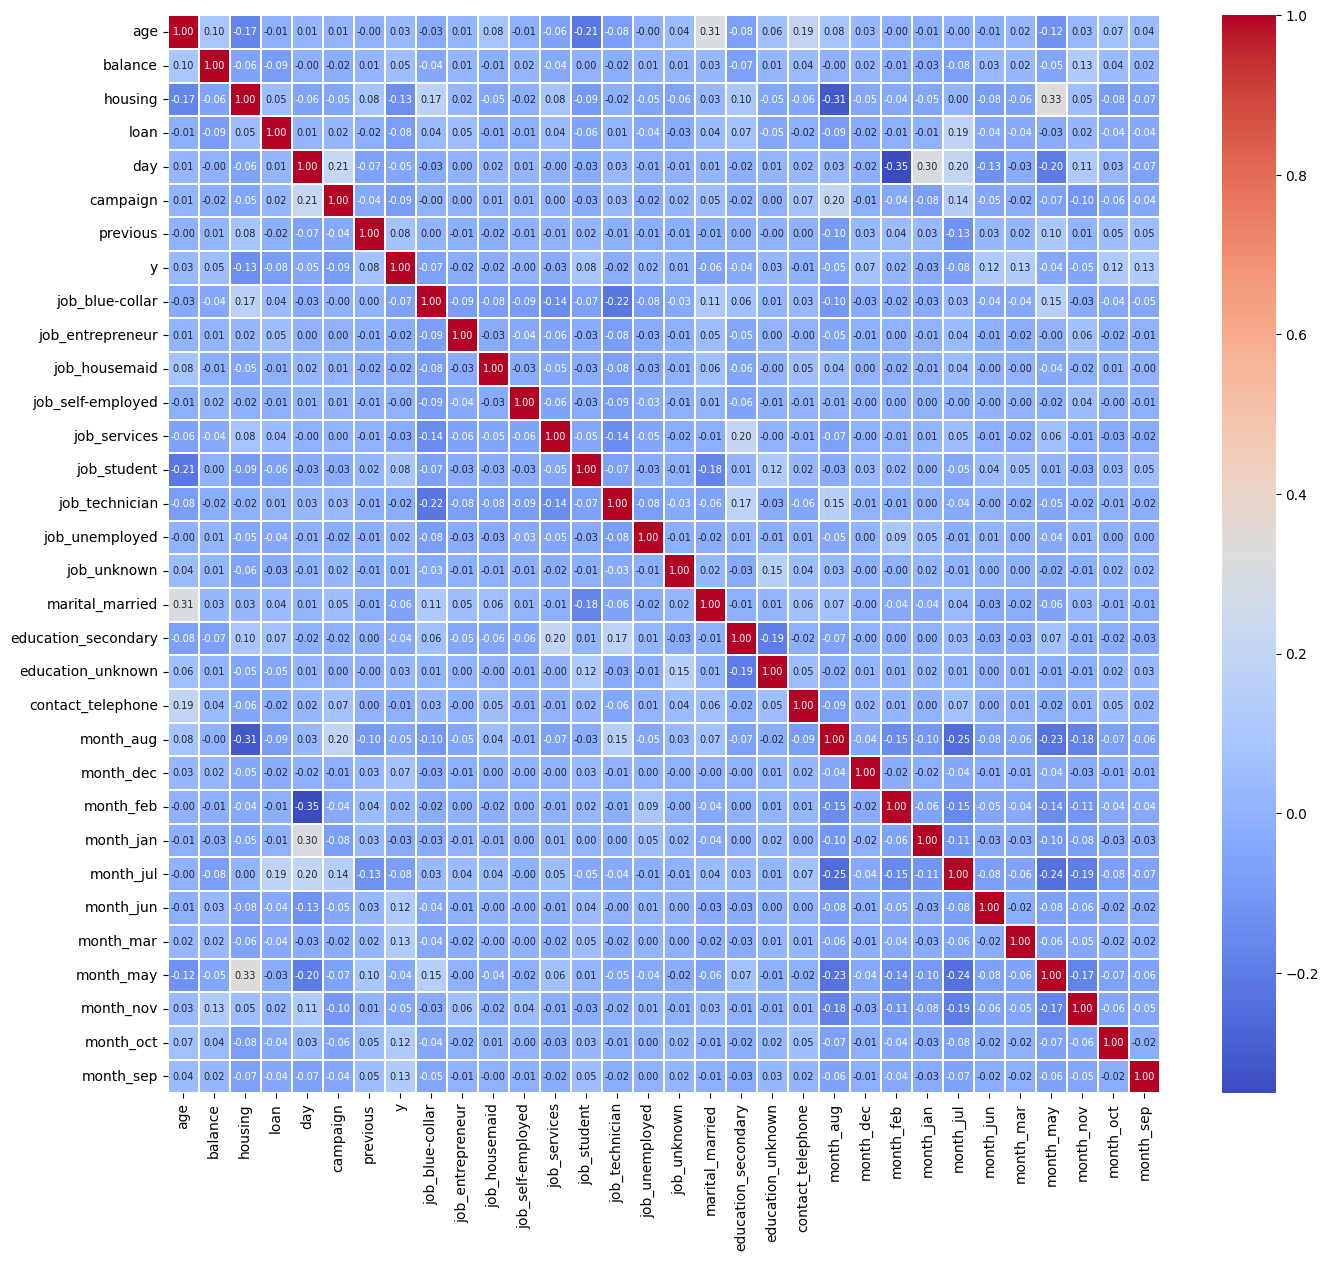

In [71]:
plt.figure(figsize=(16,14))

# Creating a heatmap to visualize the correlation matrix of numeric columns
sns.heatmap(bank_df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.2, 
    annot_kws={"size": 7})

plt.show()

The last step of feature engineering is to blend `housing` and `loan` together, as both of them indicate, generally speaking, if a client has a loan or not. I will apply a label encoding as follows:
- If there were no loans (0 and 0), the encoding will be 0.
- If there was at least one loan (1 and 0 / 0 and 1 / 1 and 1), the encoding will be 1.

In [72]:
# Combining 'housing' and 'loan' columns into a new column 'loans'
bank_df_encoded['loans'] = (bank_df_encoded['housing'] | bank_df_encoded['loan']).astype(int)

# Dropping 'housing' and 'loan' columns
bank_df_encoded.drop(['housing', 'loan'], axis=1, inplace=True)

# Displaying the resulting DataFrame
bank_df_encoded

,age,balance,day,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_self-employed,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loans
0,-0.705882,-0.309142,-1.0,-0.5,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.882353,-0.008374,-1.0,-0.5,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0.235294,-0.260293,-1.0,0.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,-0.470588,-0.320307,-1.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.705882,-0.245639,-1.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,0.705882,0.242149,0.083333,0.5,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32187,1.882353,0.872994,0.083333,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32188,1.941176,3.654571,0.083333,1.5,3,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32189,1.058824,0.132589,0.083333,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### **SECTION B: FINAL DATAFRAME**

In [73]:
bank_df_final = bank_df_encoded

# Display information about the DataFrame
bank_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32191 non-null  Float64
 1   balance              32191 non-null  Float64
 2   day                  32191 non-null  Float64
 3   campaign             32191 non-null  Float64
 4   previous             32191 non-null  Int64  
 5   y                    32191 non-null  int64  
 6   job_blue-collar      32191 non-null  int64  
 7   job_entrepreneur     32191 non-null  int64  
 8   job_housemaid        32191 non-null  int64  
 9   job_self-employed    32191 non-null  int64  
 10  job_services         32191 non-null  int64  
 11  job_student          32191 non-null  int64  
 12  job_technician       32191 non-null  int64  
 13  job_unemployed       32191 non-null  int64  
 14  job_unknown          32191 non-null  int64  
 15  marital_married      32191 non-null 

In [74]:
# Convert Dtype of DataFrame to 'float64' and display information
bank_df_final = bank_df_final.astype('float64')
bank_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32191 entries, 0 to 32190
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32191 non-null  float64
 1   balance              32191 non-null  float64
 2   day                  32191 non-null  float64
 3   campaign             32191 non-null  float64
 4   previous             32191 non-null  float64
 5   y                    32191 non-null  float64
 6   job_blue-collar      32191 non-null  float64
 7   job_entrepreneur     32191 non-null  float64
 8   job_housemaid        32191 non-null  float64
 9   job_self-employed    32191 non-null  float64
 10  job_services         32191 non-null  float64
 11  job_student          32191 non-null  float64
 12  job_technician       32191 non-null  float64
 13  job_unemployed       32191 non-null  float64
 14  job_unknown          32191 non-null  float64
 15  marital_married      32191 non-null 

In [75]:
# Compute and transpose the summary statistics DataFrame
bank_df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32191.0,0.121892,0.650436,-1.235294,-0.411765,0.0,0.588235,3.294118
balance,32191.0,0.667521,2.227209,-5.929518,-0.276343,0.0,0.723657,70.934403
day,32191.0,-0.001090,0.688495,-1.250000,-0.583333,0.0,0.416667,1.250000
campaign,32191.0,0.377140,1.490042,-0.500000,-0.500000,0.0,0.500000,24.000000
previous,32191.0,0.806157,2.678185,0.000000,0.000000,0.0,1.000000,275.000000
y,32191.0,0.147836,0.354943,0.000000,0.000000,0.0,0.000000,1.000000
job_blue-collar,32191.0,0.179149,0.383483,0.000000,0.000000,0.0,0.000000,1.000000
job_entrepreneur,32191.0,0.032338,0.176900,0.000000,0.000000,0.0,0.000000,1.000000
job_housemaid,32191.0,0.027927,0.164766,0.000000,0.000000,0.0,0.000000,1.000000
job_self-employed,32191.0,0.036718,0.188072,0.000000,0.000000,0.0,0.000000,1.000000


In [76]:
bank_df_final

,age,balance,day,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_self-employed,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,loans
0,-0.705882,-0.309142,-1.000000,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.882353,-0.008374,-1.000000,-0.5,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,-0.260293,-1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.470588,-0.320307,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.705882,-0.245639,-1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186,0.705882,0.242149,0.083333,0.5,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32187,1.882353,0.872994,0.083333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32188,1.941176,3.654571,0.083333,1.5,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
32189,1.058824,0.132589,0.083333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


`bank_df_final` consists of 32191 rows and 31 columns. Each column has a Dtype of float64, which is preferable for several machine learning algorithms.

The means of variables are close to 0 in every column, which is optimal for machine learning models. However, the standard deviation is not close to 1, but, on the other hand, it's not so far from 1, so it's still acceptable. Distribution inside variables is not Gaussian, but it can be acceptable as well.

## **PART 4: CLASSIFICATION MODELS**

### **SPLIT DATA**

In [77]:
# Split the dataset into features (X) and target (y)
X = bank_df_final.drop('y', axis=1)
y = bank_df_final['y']

In [78]:
# Split dataset into train (80%) and test (20%)
# I set a random state to ensure that the split process will always give the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split test set into test (50%) and validation (50%)
# I set a random state to ensure that the split process will always give the same result
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# The final split is 80/10/10
print("Train set sizes:", X_train.shape, y_train.shape)
print("Test set sizes:", X_test.shape, y_test.shape)
print("Validation set sizes:", X_valid.shape, y_valid.shape)

Train set sizes: (25752, 30) (25752,)
Test set sizes: (3219, 30) (3219,)
Validation set sizes: (3220, 30) (3220,)


In [79]:
# Calculate the percentage of "yes" and "no" in the original dataset
original_counts = y.value_counts(normalize=True)

# Calculate the percentage of "yes" and "no" in the training set
train_counts = y_train.value_counts(normalize=True)

# Calculate the percentage of "yes" and "no" in the validation set
valid_counts = y_valid.value_counts(normalize=True)

# Calculate the percentage of "yes" and "no" in the test set
test_counts = y_test.value_counts(normalize=True)

# Print the results
print("Original Dataset:")
print(original_counts)
print("\nTraining Set:")
print(train_counts)
print("\nValidation Set:")
print(valid_counts)
print("\nTest Set:")
print(test_counts)

Original Dataset:
y
0.0    0.852164
1.0    0.147836
Name: proportion, dtype: float64

Training Set:
y
0.0    0.852672
1.0    0.147328
Name: proportion, dtype: float64

Validation Set:
y
0.0    0.85528
1.0    0.14472
Name: proportion, dtype: float64

Test Set:
y
0.0    0.844983
1.0    0.155017
Name: proportion, dtype: float64


Now the final DataFrame has been randomly split into train, test, and validation sets (80/10/10). Moreover, we can observe that the distribution of class 0 and class 1 is the same between the subset of the DataFrame and the original DataFrame.

From now on, all my machine learning work will be focused on finding the best predictions for class 1, as it's not prevalent at all in the target variable. This means that I'll only make comments on class 1 and completely ignore class 0.

### **LOGISTIC REGRESSION**

I decided to start with `logistic regression` because it is designed to work with a target variable that is a binary encoded categorical variable, which is the case with `y`. I chose it because of its simplicity, interpretability, and efficient handling of categorical features.

In [59]:
# Create and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions on the validation set
y_pred_valid_log_reg = log_reg.predict(X_valid)

# Predictions on the test set
y_pred_test_log_reg = log_reg.predict(X_test)

In [60]:
# Calculate accuracy on the validation set
accuracy_valid_log_reg = metrics.accuracy_score(y_valid, y_pred_valid_log_reg)
print("Validation set accuracy:", accuracy_valid_log_reg)

# Calculate accuracy on the test set
accuracy_test_log_reg = metrics.accuracy_score(y_test, y_pred_test_log_reg)
print("Test set accuracy:", accuracy_test_log_reg)

Validation set accuracy: 0.85
Test set accuracy: 0.8468468468468469


Text(113.9222222222222, 0.5, 'predicted label')

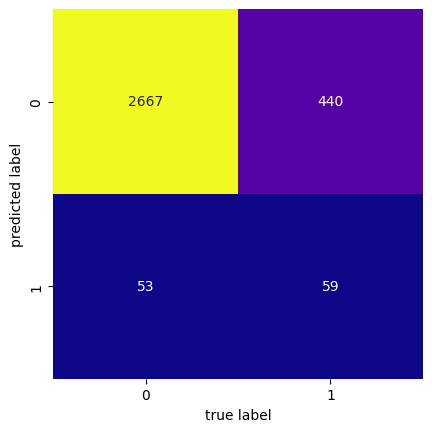

In [61]:
# Calculate the confusion matrix
mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_test_log_reg)

# Plot the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='plasma')

# Add labels to the plot
plt.xlabel('true label')
plt.ylabel('predicted label')

In [62]:
# Print the classification report
print(metrics.classification_report(y_pred_test_log_reg, y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92      3107
         1.0       0.12      0.53      0.19       112

    accuracy                           0.85      3219
   macro avg       0.55      0.69      0.55      3219
weighted avg       0.95      0.85      0.89      3219



I'm starting this process without any hyperparameters, and the performance of this `logistic regression` is very poor. Precision is only 12%, and the F1 Score is just 19%. I'll apply some fine-tuning to balance the importance of class 1 with class 0 to overcome the problem of its low presence within the DataFrame.

In [63]:
# Create and train the logistic regression model
log_reg = LogisticRegression(random_state=42, multi_class='ovr', class_weight='balanced', penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)

# Predictions on the validation set
y_pred_valid_log_reg = log_reg.predict(X_valid)

# Predictions on the test set
y_pred_test_log_reg = log_reg.predict(X_test)

In [64]:
# Calculate accuracy on the validation set
accuracy_valid_log_reg = metrics.accuracy_score(y_valid, y_pred_valid_log_reg)
print("Validation set accuracy:", accuracy_valid_log_reg)

# Calculate accuracy on the test set
accuracy_test_log_reg = metrics.accuracy_score(y_test, y_pred_test_log_reg)
print("Test set accuracy:", accuracy_test_log_reg)

Validation set accuracy: 0.7295031055900622
Test set accuracy: 0.7315936626281454


Text(113.9222222222222, 0.5, 'predicted label')

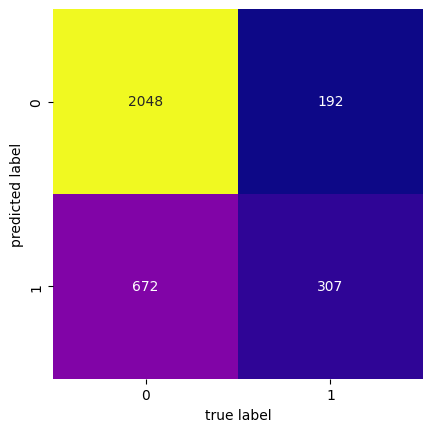

In [65]:
# Calculate the confusion matrix
mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_test_log_reg)

# Plot the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='plasma')

# Add labels to the plot
plt.xlabel('true label')
plt.ylabel('predicted label')

In [66]:
# Print the classification report
print(metrics.classification_report(y_pred_test_log_reg, y_test))

              precision    recall  f1-score   support

         0.0       0.75      0.91      0.83      2240
         1.0       0.62      0.31      0.42       979

    accuracy                           0.73      3219
   macro avg       0.68      0.61      0.62      3219
weighted avg       0.71      0.73      0.70      3219



This new `logistic regression` model offers improved predictions. Specifically, setting the hyperparameter `class_weight='balanced'` makes class 1 more significant. As a result, precision, recall, and F1 score are higher than before. It's worth noting that class 0 has slightly worse performance, but class 1 is much better than before.

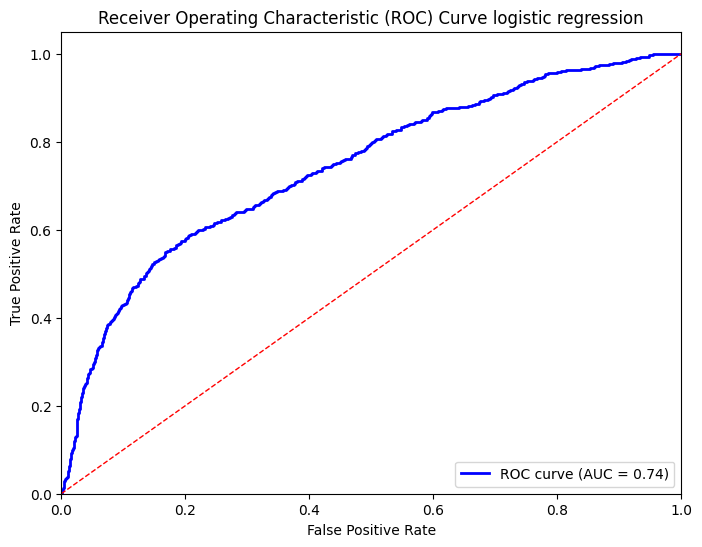

In [67]:
# Compute predicted probabilities of belonging to class 1
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# Compute Area Under Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve logistic regression')  # Title of the plot
plt.legend(loc='lower right')  # Legend location
plt.show()


The Receiver Operating Characteristic (ROC) curve represents the trade-off between the true positive rate (TPR or recall) and the false positive rate (FPR) as the classification threshold varies. As you can see, the AUC value is considered good, but the positioning of the ROC curve is not optimal. In fact, it indicates that the false positive rate is high, while the true positive rate is low.

### **RANDOM FOREST CLASSIFIER**

As for another model, I'll create a `random forest classifier`. I chose it because it handles missing values and outliers well, provides information on feature relevance, and optimally handles unbalanced datasets.

In [68]:
# Create and train the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_pred_valid_rf_classifier = rf_classifier.predict(X_valid)

# Predictions on the test set
y_pred_test_rf_classifier = rf_classifier.predict(X_test)

In [69]:
# Calculate accuracy on the validation set
accuracy_valid_rf_classifier = metrics.accuracy_score(y_valid, y_pred_valid_rf_classifier)
print("Validation set accuracy:", accuracy_valid_rf_classifier)

# Calculate accuracy on the test set
accuracy_test_rf_classifier = metrics.accuracy_score(y_test, y_pred_test_rf_classifier)
print("Test set accuracy:", accuracy_test_rf_classifier)

Validation set accuracy: 0.8546583850931677
Test set accuracy: 0.8536812674743709


Text(113.9222222222222, 0.5, 'predicted label')

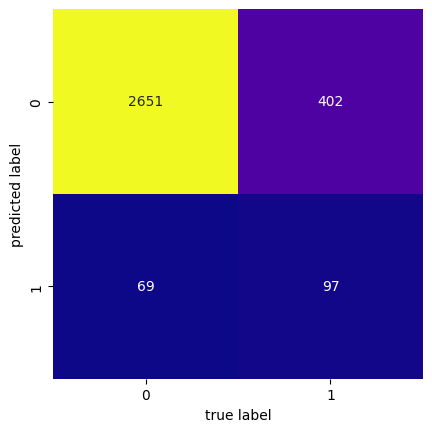

In [70]:
# Calculate the confusion matrix
mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_test_rf_classifier)

# Plot the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='plasma')

# Add labels to the plot
plt.xlabel('true label')
plt.ylabel('predicted label')

In [71]:
# Print the classification report
print(metrics.classification_report(y_pred_test_rf_classifier, y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      3053
         1.0       0.19      0.58      0.29       166

    accuracy                           0.85      3219
   macro avg       0.58      0.73      0.61      3219
weighted avg       0.93      0.85      0.89      3219



As for logistic regression, I'm starting this process without any hyperparameters, and the performance of again very poor, but better than logistic regression. Precision is only 19%, and the F1 Score is just 29%. I'll apply some fine-tuning in terms of leaves and depth to balance class 1 with class 0.

In [72]:
val_accuracies = []  # List to store validation accuracies
train_accuracies = []  # List to store training accuracies
models = []  # List to store trained models

# Loop over different values of max_depth and max_leaf_nodes
for depth in range(3, 30, 3):
    for leaves in range(2, 30, 2):
        # Train and predict a RandomForestClassifier
        dt = RandomForestClassifier(max_leaf_nodes=leaves, max_depth=depth, random_state=42)
        dt.fit(X_train, y_train)
        models.append(dt)  # Add trained model to the list of models
        
        # Compute Accuracy on train and validation sets
        train_acc = metrics.accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
        valid_acc = metrics.accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
        print("Train Accuracy: {:.7f} - Validation Accuracy: {:.7f}".format(train_acc, valid_acc))

        # Append accuracies to the lists
        val_accuracies.append(valid_acc)
        train_accuracies.append(train_acc)

# Pick the model with higher validation accuracy
best_model_idx = np.argmax(val_accuracies)  # Index of the model with the highest validation accuracy
best_model = models[best_model_idx]  # Best model
print("Best Max Leaves:", best_model.max_leaf_nodes)
print("Best Max Depth:", best_model.max_depth)

Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.8552795
Train Accuracy: 0.8526716 - Validation Accuracy: 0.85527

In [82]:
# Create and train the random forest classifier
rf_classifier = RandomForestClassifier(max_leaf_nodes=28, max_depth=9, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_pred_valid_rf_classifier = rf_classifier.predict(X_valid)

# Predictions on the test set
y_pred_test_rf_classifier = rf_classifier.predict(X_test)

In [74]:
# Calculate accuracy on the validation set
accuracy_valid_rf_classifier = metrics.accuracy_score(y_valid, y_pred_valid_rf_classifier)
print("Validation set accuracy:", accuracy_valid_rf_classifier)

# Calculate accuracy on the test set
accuracy_test_rf_classifier = metrics.accuracy_score(y_test, y_pred_test_rf_classifier)
print("Test set accuracy:", accuracy_test_rf_classifier)

Validation set accuracy: 0.8562111801242236
Test set accuracy: 0.8456042249145698


Text(113.9222222222222, 0.5, 'predicted label')

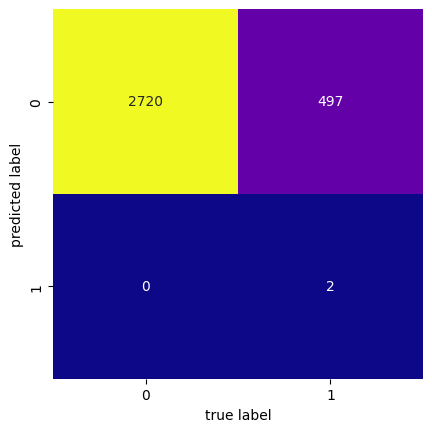

In [75]:
# Calculate the confusion matrix
mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_test_rf_classifier)

# Plot the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='plasma')

# Add labels to the plot
plt.xlabel('true label')
plt.ylabel('predicted label')

In [76]:
# Print the classification report
print(metrics.classification_report(y_pred_test_rf_classifier, y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      3217
         1.0       0.00      1.00      0.01         2

    accuracy                           0.85      3219
   macro avg       0.50      0.92      0.46      3219
weighted avg       1.00      0.85      0.92      3219



Using a double for loop, I tested different values of max_depth and max_leaf_nodes, discovering that the optimal ones, in terms of accuracy, are leaves 28 and depth 9. However, upon analyzing other metrics, a strong overfitting of class 0 and a near absence of class 1 are observed. Now I will try further fine-tuning to address this situation.

In [77]:
val_accuracies = []  # List to store validation accuracies
train_accuracies = []  # List to store training accuracies
models = []  # List to store trained models

# Loop over different values of max_depth and max_leaf_nodes
for depth in range(3, 30, 3):
    for leaves in range(2, 30, 2):
        # Train and predict a RandomForestClassifier
        dt = RandomForestClassifier(max_leaf_nodes=leaves, max_depth=depth, random_state=42, class_weight='balanced')
        dt.fit(X_train, y_train)
        models.append(dt)  # Add trained model to the list of models
        
        # Compute Accuracy on train and validation sets
        train_acc = metrics.accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
        valid_acc = metrics.accuracy_score(y_true=y_valid, y_pred=dt.predict(X_valid))
        print("Train Accuracy: {:.7f} - Validation Accuracy: {:.7f}".format(train_acc, valid_acc))

        # Append accuracies to the lists
        val_accuracies.append(valid_acc)
        train_accuracies.append(train_acc)

# Pick the model with higher validation accuracy
best_model_idx = np.argmax(val_accuracies)  # Index of the model with the highest validation accuracy
best_model = models[best_model_idx]  # Best model
print("Best Max Leaves:", best_model.max_leaf_nodes)
print("Best Max Depth:", best_model.max_depth)

Train Accuracy: 0.6873253 - Validation Accuracy: 0.6844720
Train Accuracy: 0.7216915 - Validation Accuracy: 0.7158385
Train Accuracy: 0.7309335 - Validation Accuracy: 0.7270186
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.7338847 - Validation Accuracy: 0.7316770
Train Accuracy: 0.6873253 - Validation Accuracy: 0.6844720
Train Accuracy: 0.7216915 - Validation Accuracy: 0.7158385
Train Accuracy: 0.7669307 - Validation Accuracy: 0.77142

In [84]:
# Create and train the random forest classifier
rf_classifier = RandomForestClassifier(max_leaf_nodes=22, max_depth=6, random_state=42, class_weight='balanced')
rf_classifier.fit(X_train, y_train)

# Predictions on the validation set
y_pred_valid_rf_classifier = rf_classifier.predict(X_valid)

# Predictions on the test set
y_pred_test_rf_classifier = rf_classifier.predict(X_test)

In [79]:
# Calculate accuracy on the validation set
accuracy_valid_rf_classifier = metrics.accuracy_score(y_valid, y_pred_valid_rf_classifier)
print("Validation set accuracy:", accuracy_valid_rf_classifier)

# Calculate accuracy on the test set
accuracy_test_rf_classifier = metrics.accuracy_score(y_test, y_pred_test_rf_classifier)
print("Test set accuracy:", accuracy_test_rf_classifier)

Validation set accuracy: 0.7847826086956522
Test set accuracy: 0.7741534638086363


Text(113.9222222222222, 0.5, 'predicted label')

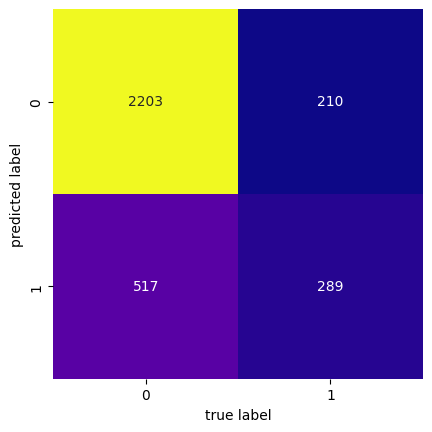

In [80]:
# Calculate the confusion matrix
mat = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_test_rf_classifier)

# Plot the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='plasma')

# Add labels to the plot
plt.xlabel('true label')
plt.ylabel('predicted label')

In [81]:
# Print the classification report
print(metrics.classification_report(y_pred_test_rf_classifier, y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.86      2413
         1.0       0.58      0.36      0.44       806

    accuracy                           0.77      3219
   macro avg       0.69      0.64      0.65      3219
weighted avg       0.75      0.77      0.75      3219



By modifying the double for loop with `class_weight='balanced'`, I found that the optimal values for max_depth and max_leaf_nodes are 22 leaves and a depth of 6. Upon analyzing the metrics, the best performance so far is achieved. The precision is 58%, the F1 score is 44%, and the accuracy is 77%.

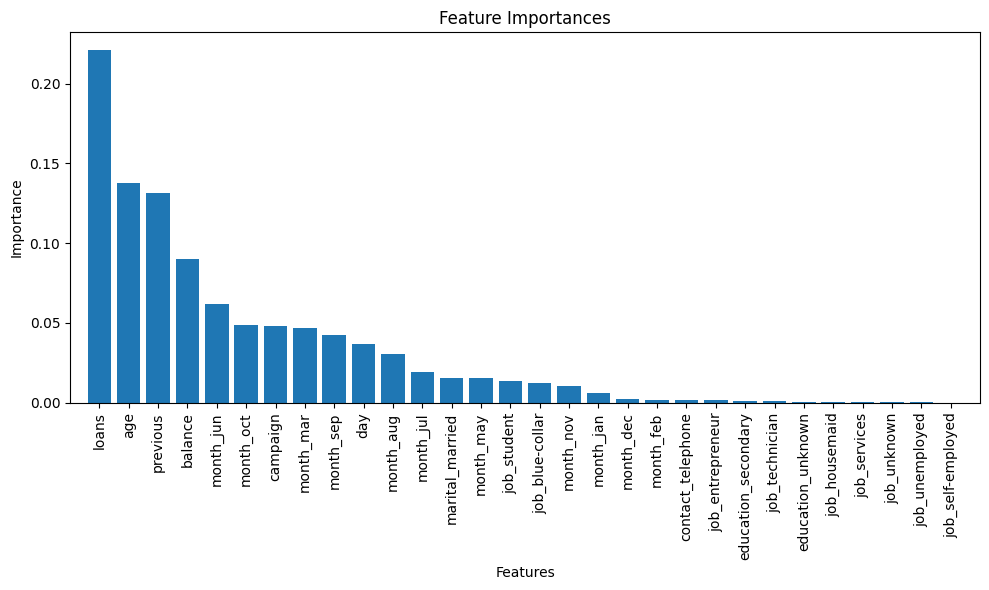

In [85]:
# Extract feature importances
importances = rf_classifier.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_features = [features[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), sorted_features, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


As we can observe, the features with the highest importance are 'loans', 'age', and 'previous'. According to the `random forest classifier`, these features are the most important, thus they have greater significance in predicting the target variable compared to the other features.

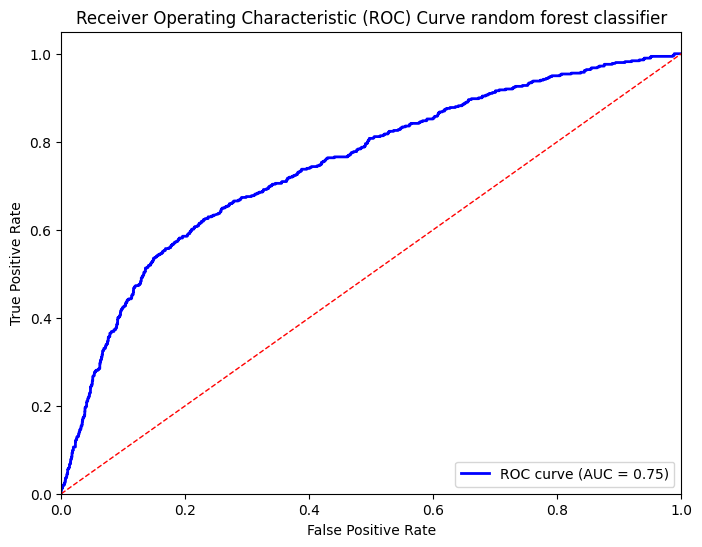

In [82]:
# Compute predicted probabilities of belonging to class 1
y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# Compute Area Under Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve random forest classifier')  # Title of the plot
plt.legend(loc='lower right')  # Legend location
plt.show()


The Receiver Operating Characteristic (ROC) curve of `random forest classifier` has a higher AUC value compared to logistic regression. Also the shape of the ROC curve is better, having fewer false positive rate and bigger true positive rate.

## **CONCLUSION**

As machine learning models, I used `logistic regression` and `random forest classifier`. I specifically chose these two because they can handle a categorical binary encoded target variable, namely `y`, with ease.

The better performing model between the two turned out to be the `random forest classifier`, showing better performance in class 1. This is attributed to its ability to handle imbalanced datasets better.

The biggest challenge of this project was managing the significant imbalance between class 0 and class 1 in `y` target variable. I managed to mitigate it by fine-tuning the hyperparameters, and overall, despite a not optimal performance of my models, I am satisfied.